# Artificial Neural Networks and Deep Learning

---

## Homework 2: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 2` in your Google Drive.
2. Upload the `mars_for_students.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 2 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.csv` file to Kaggle.


## 🌐 Connect Colab to Google Drive

In [1]:
from google.colab import drive

drive.mount("/gdrive", force_remount=True)
%cd /gdrive/MyDrive/UNI/ANN/Homework2

Mounted at /gdrive
/gdrive/MyDrive/UNI/ANN/Homework2


## ⚙️ Import Libraries

In [2]:
pip install -U 'git+https://github.com/albumentations-team/albumentations'

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-uf5yh2in
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations /tmp/pip-req-build-uf5yh2in
  Resolved https://github.com/albumentations-team/albumentations to commit 47c24503e0636f258e2af2b18e552d52271308bf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 4.5 MB/s eta 0:00:00
  Created wheel for albumentations: filename=albumentations-1.4.22-py3-none-any.whl size=258445 sha256=a402c2015f0d018042f14b0202ffe1f7dd2ba6c06a9c0eb07a55c4a1a646daa7
  Stored in directory: /tmp/pip-ephem-wheel-cache-vlxeua28/wheels/51/4d/ab/5aafa8b980086fbc362946de7da4aa3df33aacb3da0da29b93
Successfully built albumentations
  Attempting uninstall: albuc

In [3]:
import albumentations as alb #A in official documentation
import cv2

In [4]:
import os
from datetime import datetime

import numpy as np
import pandas as pd
import math

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tfk.__version__}")
print(f"GPU devices: {len(tf.config.list_physical_devices('GPU'))}")

TensorFlow version: 2.17.1
Keras version: 3.5.0
GPU devices: 1


## ⏳ Load the Data

In [5]:
data = np.load("mars_for_students.npz")

training_set = data["training_set"]
X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]

print(f"Training X shape: {X_train.shape}")
print(f"Training y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}")

Training X shape: (2615, 64, 128)
Training y shape: (2615, 64, 128)
Test X shape: (10022, 64, 128)


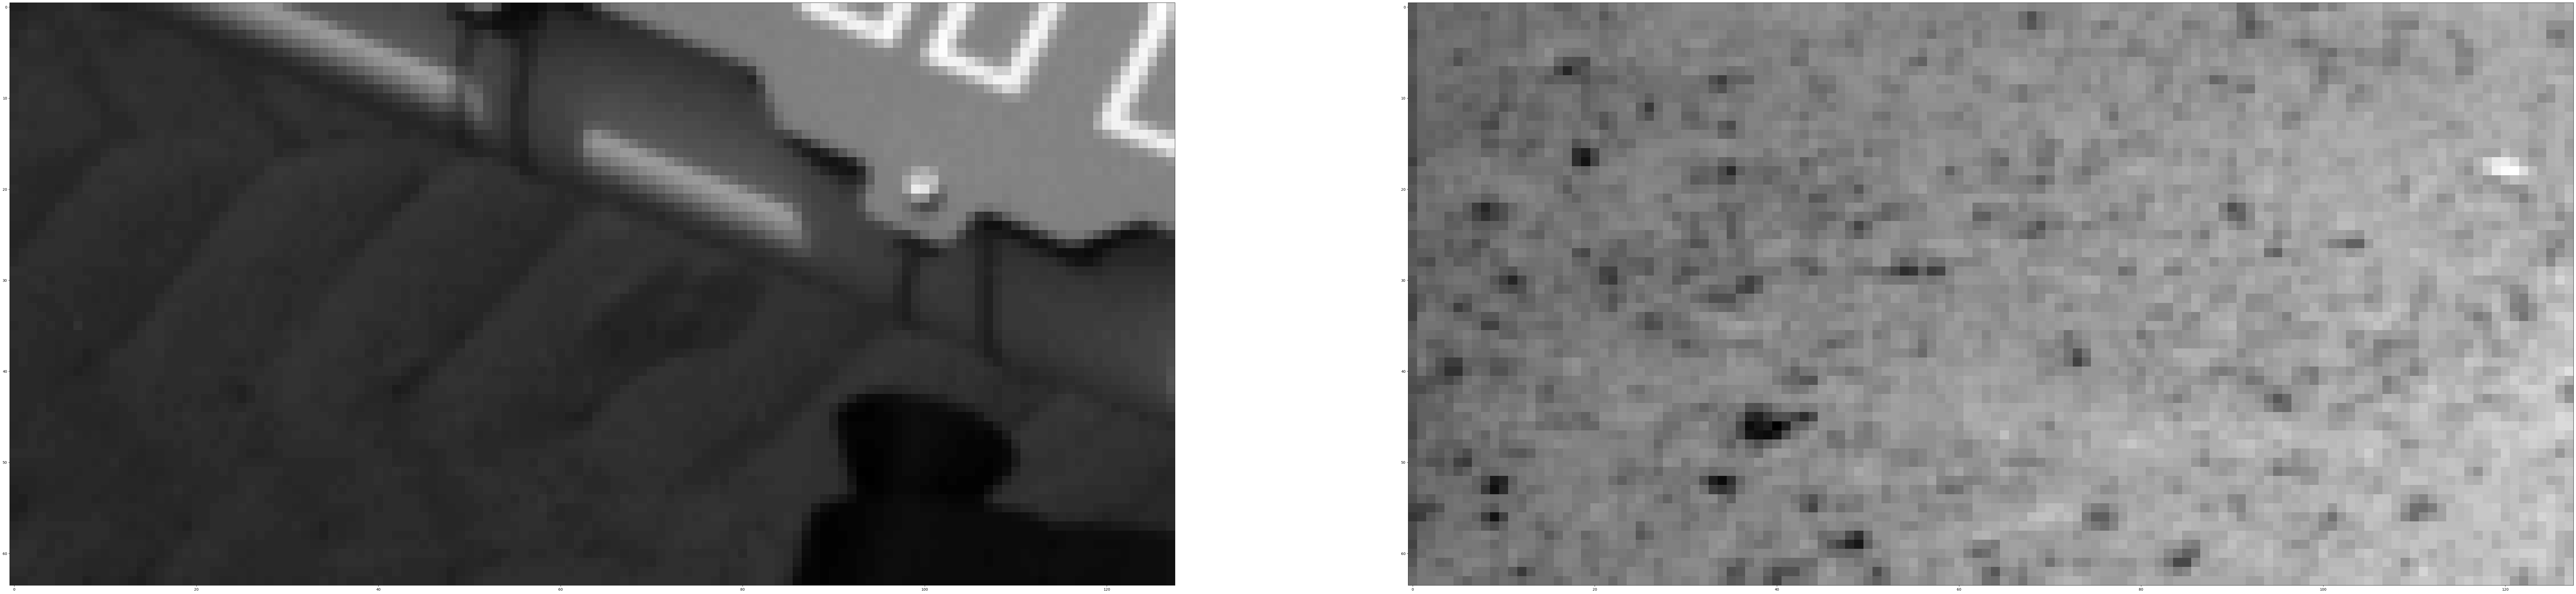

In [6]:
to_print = [8, 66]

fig, axes = plt.subplots(1, len(to_print), figsize=(128, 64))
for i, idx in enumerate(to_print):
    axes[i].imshow(X_train[idx], cmap="gray")

# 🗺 Data exploration

## Print some random images

In [ ]:
# Print some random images from X_train with the relative y_train image printed on top
num_images = 10
indices = np.random.choice(len(X_train), size=num_images, replace=False)

fig, axes = plt.subplots(num_images, 2, figsize=(10, 20))
for i, idx in enumerate(indices):
    ax1, ax2 = axes[i]
    ax1.imshow(X_train[idx], cmap="gray")
    ax1.set_title(f"X_train[{idx}]")
    ax2.imshow(y_train[idx])
    ax2.set_title(f"y_train[{idx}]")
    ax1.axis("off")
    ax2.axis("off")
plt.tight_layout()
plt.show()

## Print tha values of y_train

In [ ]:
# Print some random images from y_train showing the actual value of the pixels
num_images = 10
indices = np.random.choice(len(y_train), size=num_images, replace=False)

fig, axes = plt.subplots(num_images, 2, figsize=(10, 20))
for i, idx in enumerate(indices):
    ax1, ax2 = axes[i]
    ax1.imshow(y_train[idx])
    ax1.set_title(f"y_train[{idx}]")
    ax2.hist(y_train[idx].flatten(), bins=100)
    ax2.set_title(f"y_train[{idx}] histogram")
    ax1.axis("off")
    ax2.set_xlabel("Pixel value")
    ax2.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

## Test set exploration

In [ ]:
# Print some random images from X_test
num_images = 20
indices = np.random.choice(len(X_test), size=num_images, replace=False)

fig, axes = plt.subplots(num_images, 1, figsize=(128, 64))
for i, idx in enumerate(indices):
    ax = axes[i]
    ax.imshow(X_test[idx], cmap="gray")
    ax.set_title(f"X_test[{idx}]")
    ax.axis("off")
plt.tight_layout()
plt.show()

# 👽 Remove Aliens

In [7]:
outliers = [62, 79, 125, 139, 142, 147, 152, 156, 170, 210, 217, 266, 289, 299, 313, 339, 348, 365, 412, 417, 426, 450, 461, 536, 552, 669, 675, 741, 744, 747, 799, 802, 808, 820, 821, 849, 863, 890, 909, 942, 971, 1005, 1057,
            1079, 1082, 1092, 1095, 1106, 1119, 1125, 1177, 1194, 1224, 1247, 1248, 1258, 1261, 1262, 1306, 1324, 1365, 1370, 1443, 1449, 1508, 1509, 1519, 1551, 1584, 1588, 1628, 1637, 1693, 1736, 1767, 1768, 1782, 1813, 1816,
            1834, 1889, 1925, 1942, 1975, 1979, 2000, 2002, 2086, 2096, 2110, 2111, 2151, 2161, 2222, 2235, 2239, 2242, 2301, 2307, 2350, 2361, 2365, 2372, 2414, 2453, 2522, 2535, 2561, 2609, 2614]

# outliers = [62, 79, 125, 139, 142, 147, 152, 156, 170, 210, 217, 266, 289, 299, 313, 339, 348, 365, 412, 417, 426, 450, 461, 536, 552, 669, 675, 741, 744, 747, 799, 802, 808, 820, 821, 849, 863, 890, 909, 942, 971, 1005, 1057,
#             1079, 1082, xxxx, 1095, 1106, 1119, 1125, 1177, 1194, 1224, 1247, 1248, 1258, 1261, 1262, 1306, 1324, 1365, 1370, 1443, 1449, 1508, 1509, 1519, 1551, 1584, 1588, 1628, 1637, 1693, 1736, 1767, 1768, 1782, 1813, 1816,
#             1834, 1889, 1925, 1942, 1975, 1979, 2000, 2002, 2086, 2096, 2110, 2111, 2151, 2161, 2222, 2235, 2239, 2242, xxxx, 2307, 2350, 2361, 2365, 2372, 2414, 2453, 2522, 2535, 2561, 2609, xxxx]

print(f"Number of outliers: {len(outliers)}")

Number of outliers: 110


In [8]:
X_train = np.delete(X_train, outliers, axis=0)
y_train = np.delete(y_train, outliers, axis=0)

# 🛠️ Train and Save the Model

In [9]:
# Add color channel and rescale pixels between 0 and 1
X_train = X_train[..., np.newaxis] / 255.0
X_test = X_test[..., np.newaxis] / 255.0

input_shape = X_train.shape[1:]
num_classes = len(np.unique(y_train))

print(f"Input shape: {input_shape}")
print(f"Number of classes: {num_classes}")

Input shape: (64, 128, 1)
Number of classes: 5


In [10]:
# Training Hyperparameters

EPOCHS = 200
BATCH_SIZE = 32
LEARNING_RATE = 1e-4
NUM_CLASSES = 5
PATIENCE = 20
seed = 42

In [11]:
# Splitting X_train and y_train in training and validation dataset
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Create tensorflow datasets for training and validation
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

# Batch the datasets
train_dataset = train_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

#Augmentation new (Albumentations)

##Settings

In [12]:
#probabilità indipendente di applicare una certa augmentation per ogni imagine
augmentation_probability = {
    "geometric": 0.7,
    "flip": 0.7,
    "dropout": 0.7,
    "gaussianBlur": 0.7,
}

#verfica e rimozione di immagini che non hanno subito augmentation ed eventuale rimozione
remove_duplicates = True


##application

In [13]:
def display_aug(img, label, title=" "):

  fig, axes = plt.subplots(1, 2, figsize=(10, 20))
  ax1, ax2 = axes[0], axes[1]  # Corrected line
  ax1.imshow(img, cmap="gray")
  ax2.imshow(label)

  # Add titles to the subplots
  ax1.set_title(f"{title}")
  ax2.set_title(f"{title} map")  # Set title from the input argument

  ax1.axis("off")
  ax2.axis("off")
  plt.tight_layout()
  plt.show()


def create_augmentation_pipeline(probability):
  return [
    #affine = zoom + rotation + translation + shear
    #deve essere eseguito per primo per evitare problemi
    alb.Affine(
        scale=(0.99,1.3),
        translate_percent= 0.1,
        rotate = (-25,25),
        mode=1,  # 1 == cv2.BORDER_REPLICATE alternative: ['cv2.BORDER_CONSTANT', 'cv2.BORDER_REPLICATE', 'cv2.BORDER_REFLECT', 'cv2.BORDER_WRAP', 'cv2.BORDER_DEFAULT', 'cv2.BORDER_TRANSPARENT']
        keep_ratio=True,p=probability["geometric"]
    ),
    alb.HorizontalFlip(p=probability["flip"]),
    alb.CoarseDropout(num_holes_range=(1,150),hole_height_range=(1,3), hole_width_range=(1,3), p=probability["dropout"]),
    alb.GaussianBlur(blur_limit=(1, 3), p=probability["gaussianBlur"]),
  ]



def apply_augmentation_to_dataset(X_train, y_train, probability):
    # Create the augmentation pipeline once, before using it in the dataset map
    augmentation_pipeline = create_augmentation_pipeline(probability)
    transform = alb.Compose(augmentation_pipeline)

    augmented_X_train = []
    augmented_y_train = []

    for i in range(len(X_train)):
        transformed = transform(image=X_train[i], mask=y_train[i])
        augmented_X_train.append(transformed['image'])
        augmented_y_train.append(transformed['mask'])

    return augmented_X_train, augmented_y_train

In [14]:
augmented_dataset = apply_augmentation_to_dataset(X_train, y_train, augmentation_probability)

Sample 1:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:0.0 0.0 0.0
test pixel augmented:0.0 0.0 0.0


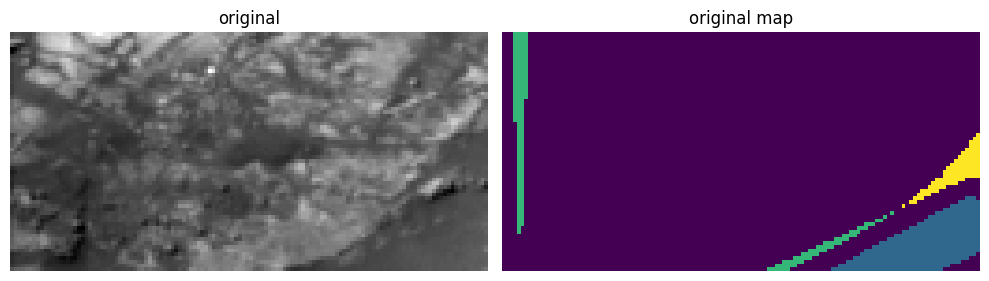

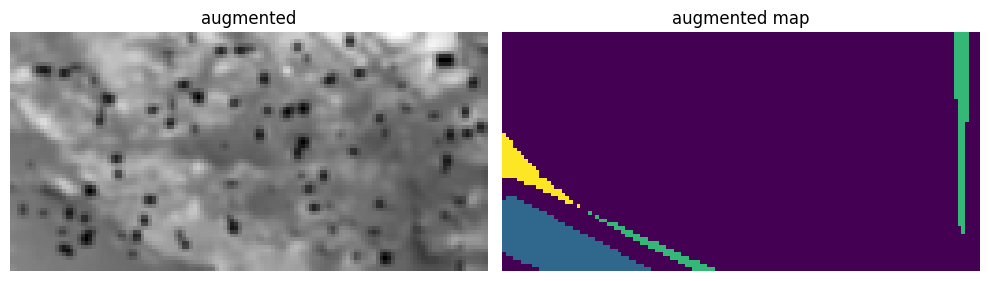

Sample 2:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 1.0
test pixel augmented:1.0 1.0 1.0


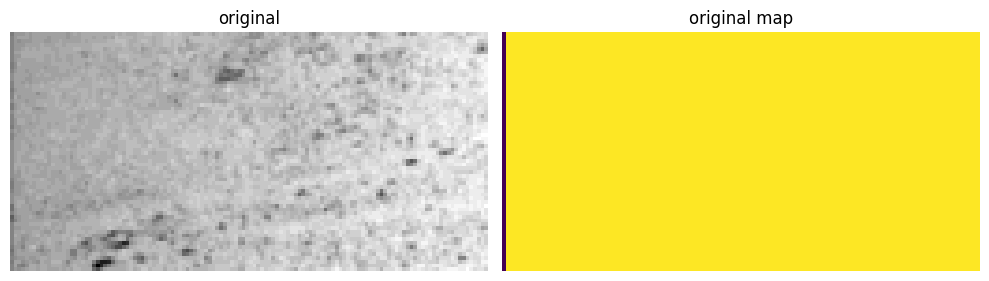

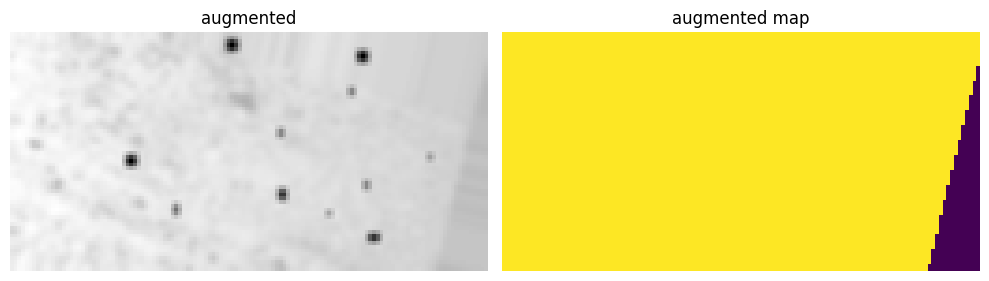

Sample 3:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:0.0 0.0 0.0
test pixel augmented:0.0 0.0 0.0


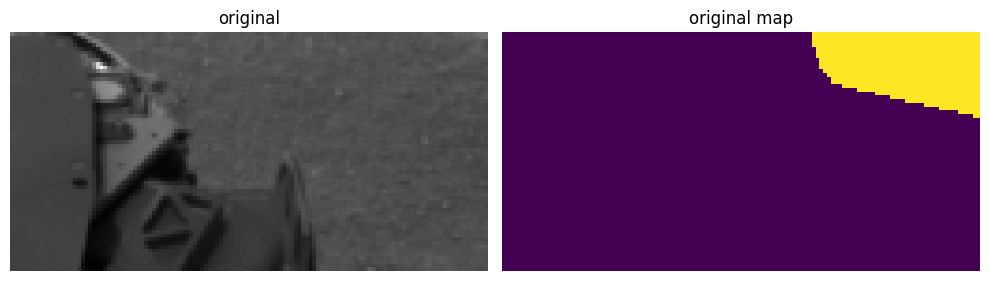

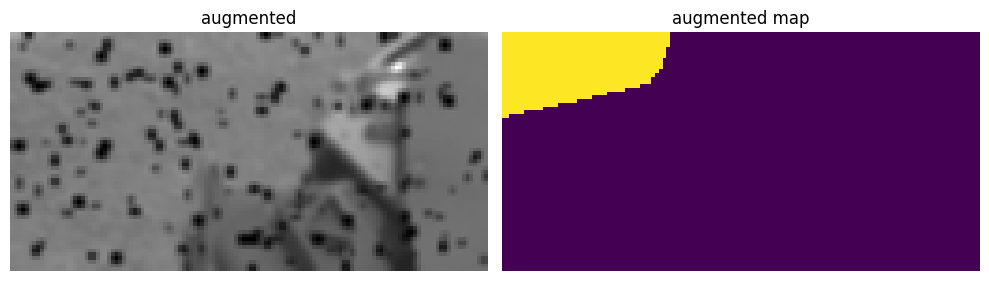

Sample 4:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 1.0
test pixel augmented:1.0 1.0 1.0


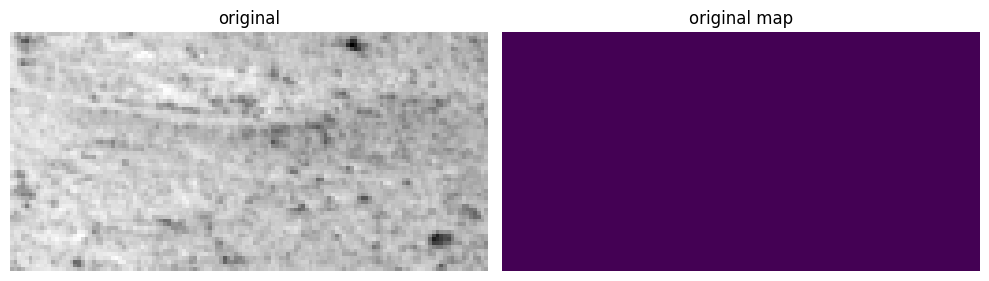

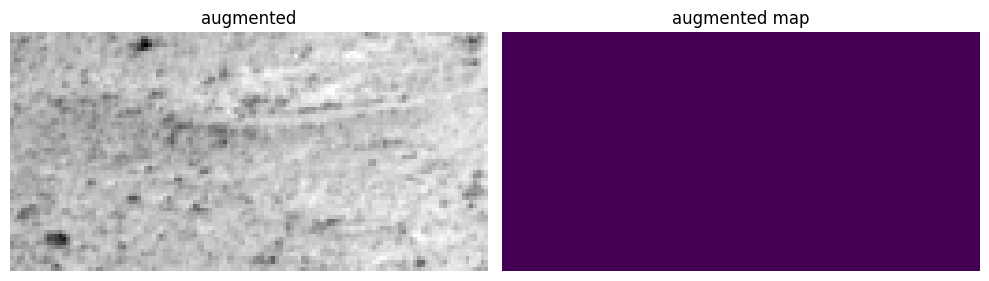

Sample 5:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 0.0
test pixel augmented:1.0 1.0 1.0


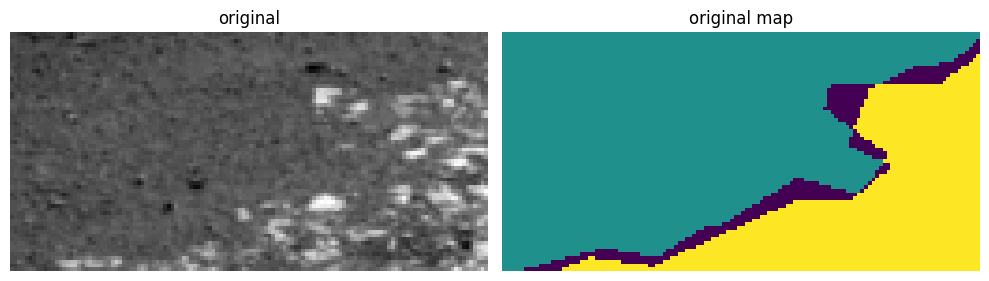

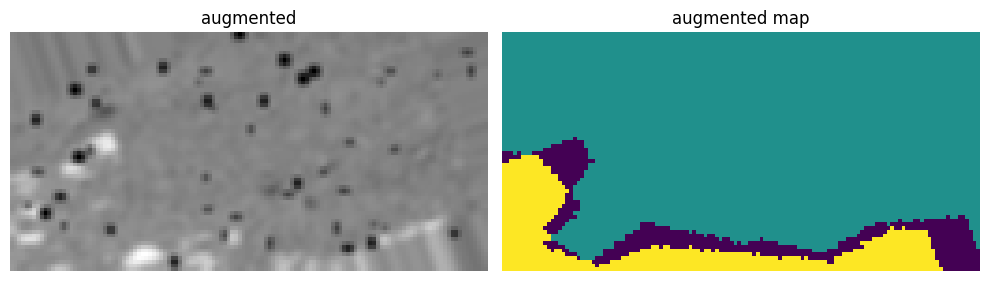

Sample 6:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 1.0
test pixel augmented:1.0 1.0 1.0


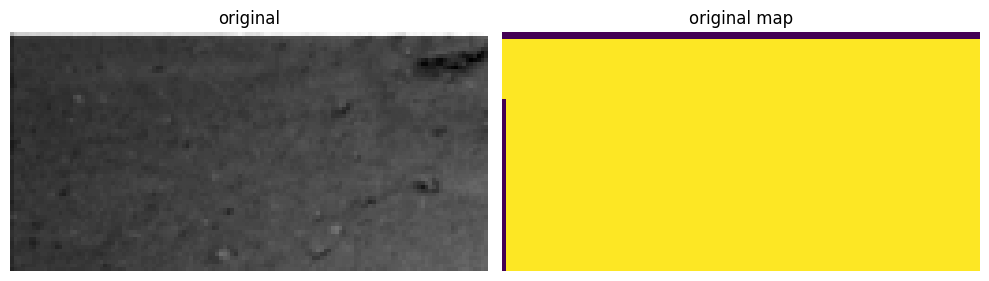

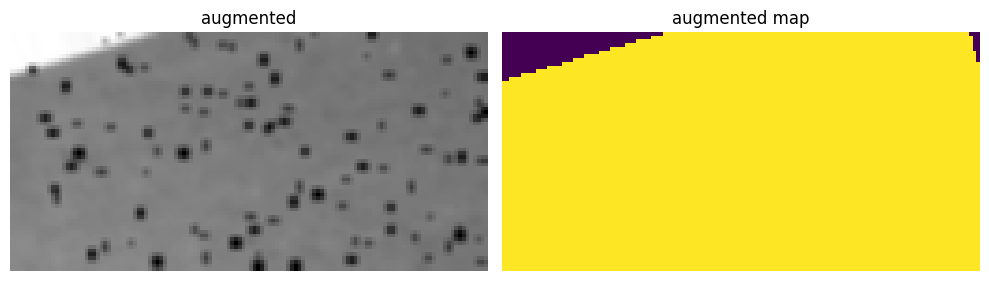

Sample 7:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 1.0
test pixel augmented:1.0 1.0 1.0


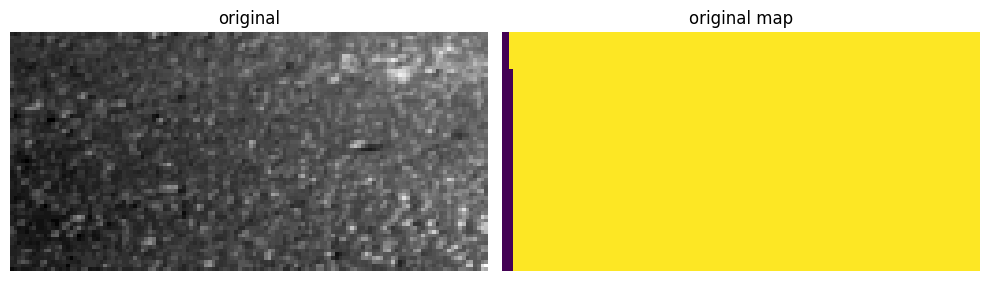

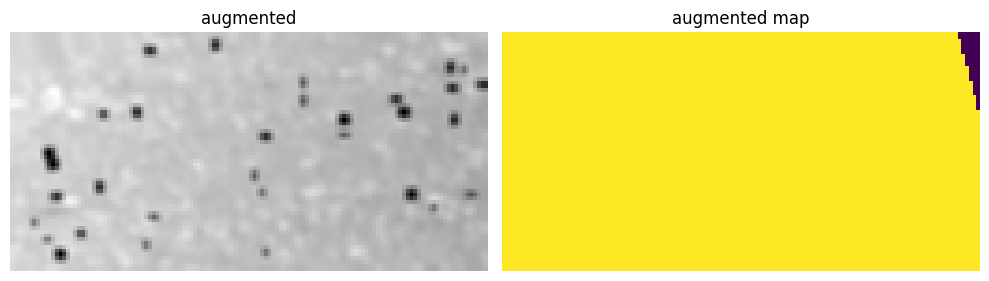

Sample 8:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 1.0
test pixel augmented:1.0 1.0 1.0


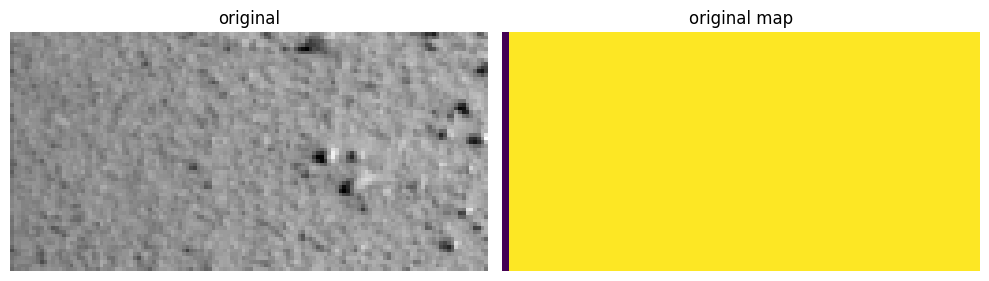

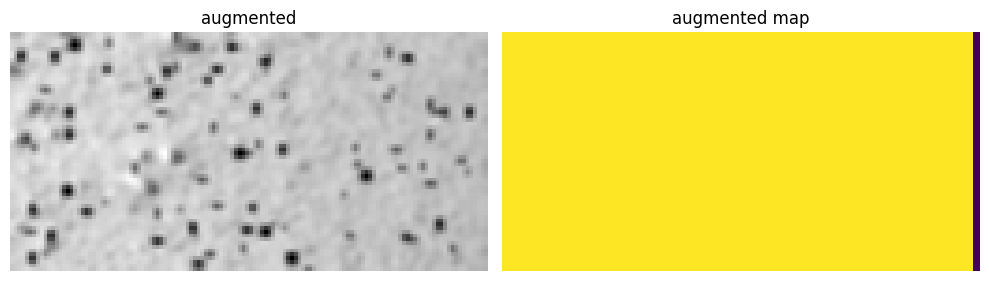

Sample 9:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:0.0 0.0 0.0
test pixel augmented:0.0 0.0 0.0


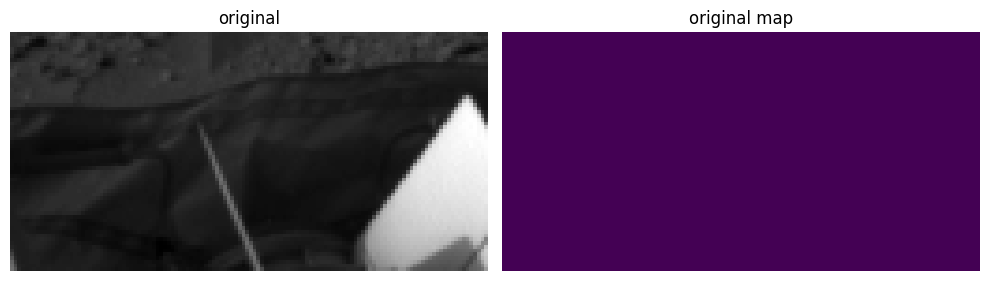

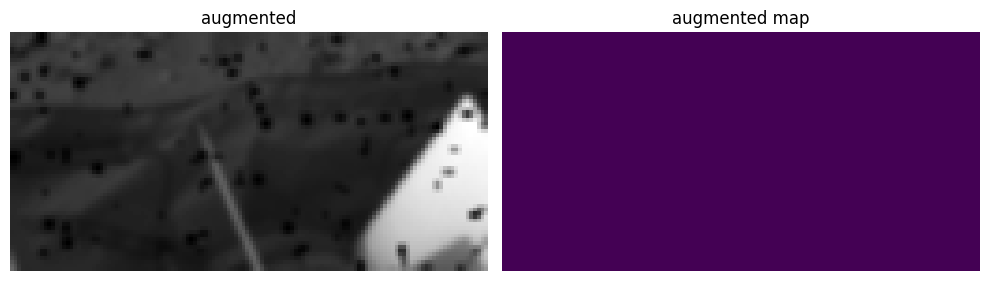

Sample 10:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:3.0 3.0 3.0
test pixel augmented:3.0 3.0 3.0


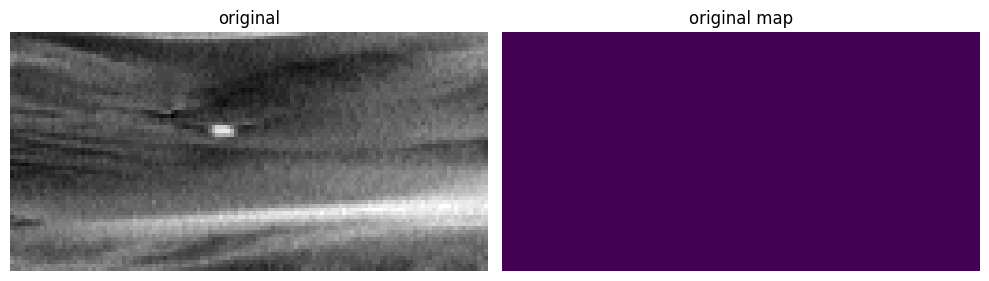

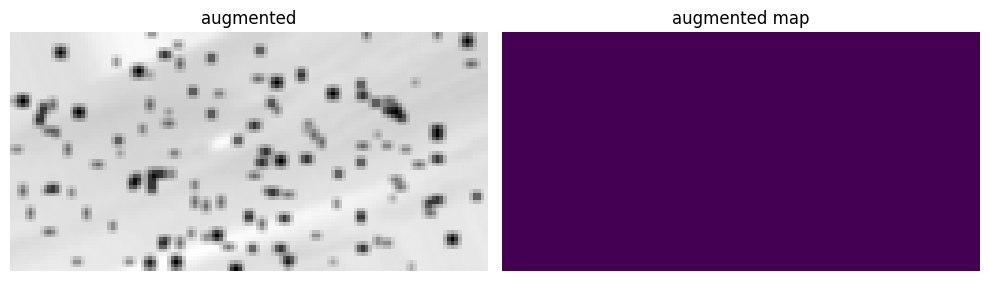

Sample 11:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:3.0 3.0 3.0
test pixel augmented:3.0 3.0 3.0


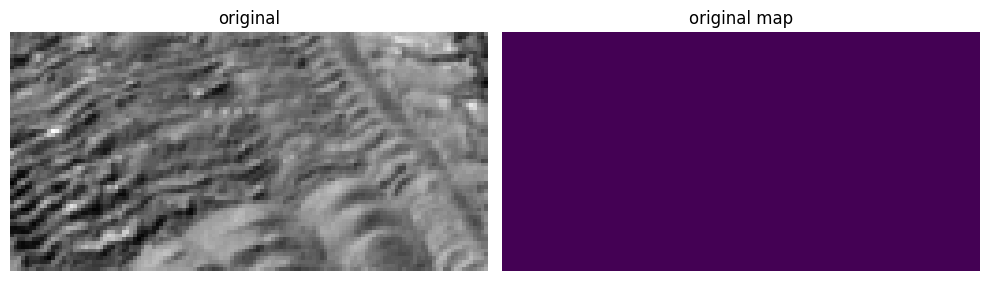

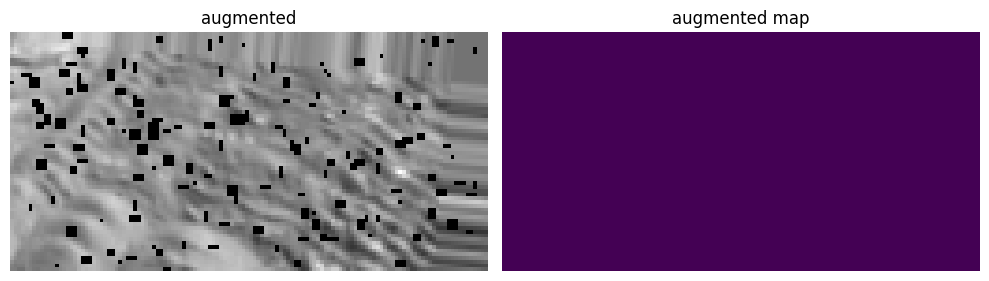

Sample 12:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 1.0
test pixel augmented:1.0 1.0 1.0


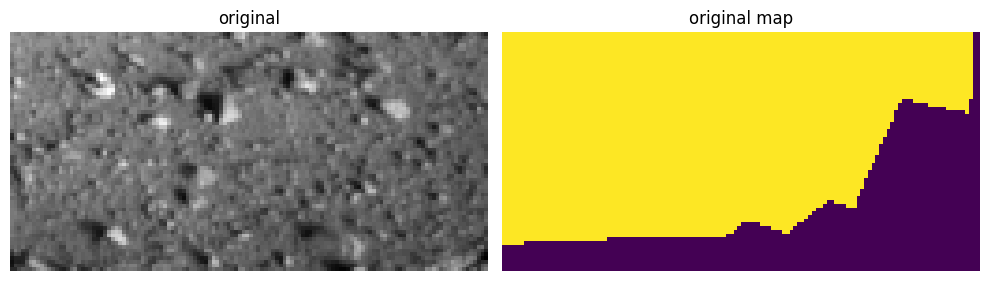

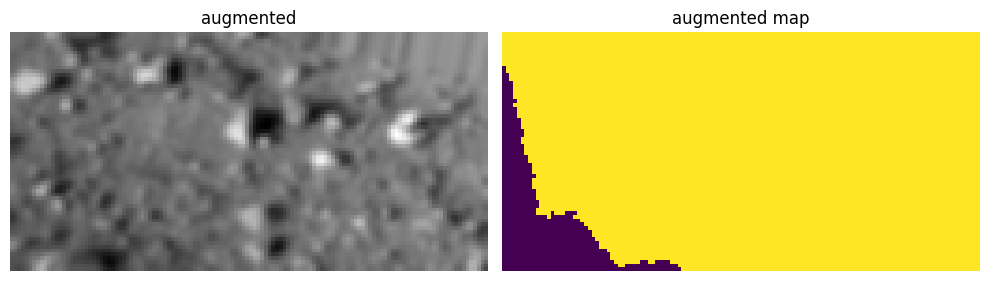

Sample 13:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:2.0 2.0 2.0
test pixel augmented:2.0 2.0 2.0


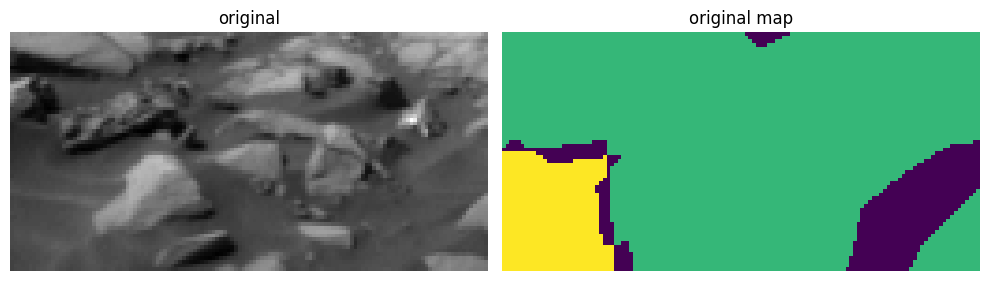

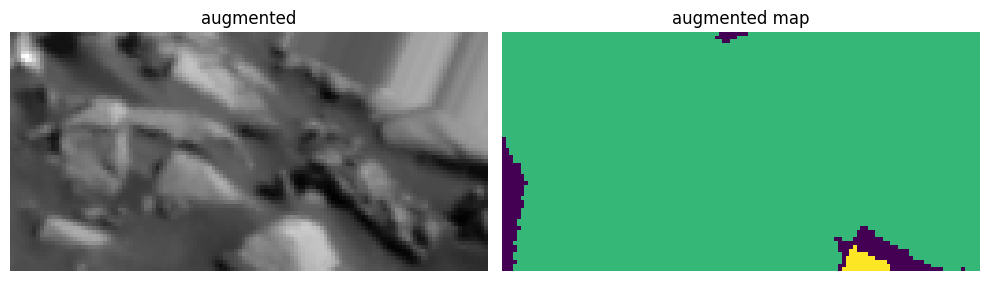

Sample 14:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:0.0 0.0 3.0
test pixel augmented:0.0 3.0 0.0


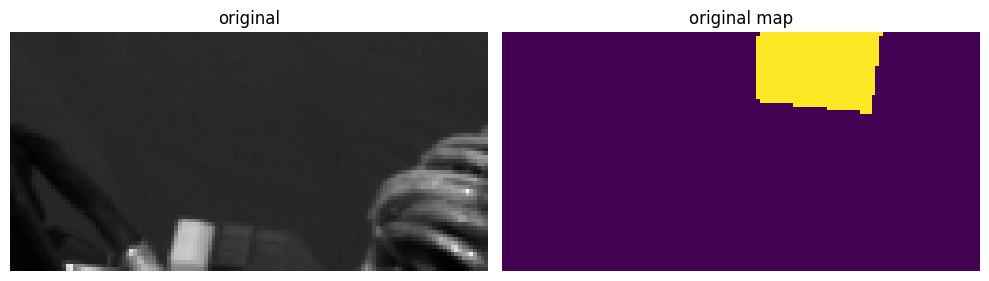

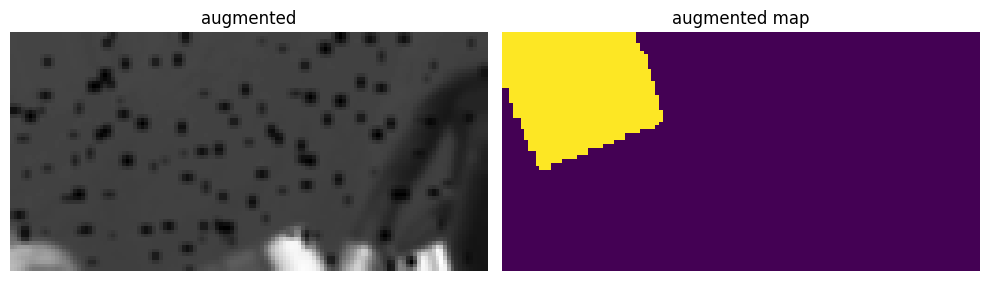

Sample 15:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:0.0 0.0 1.0
test pixel augmented:1.0 1.0 0.0


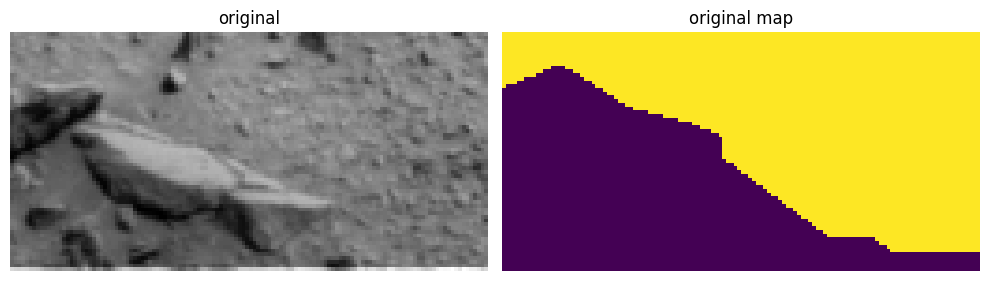

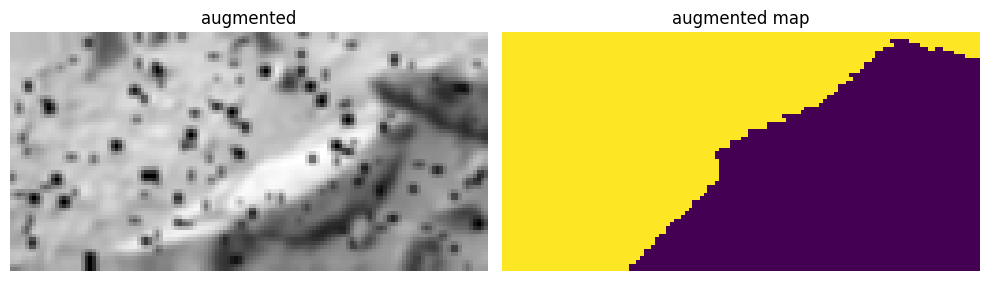

Sample 16:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:2.0 2.0 2.0
test pixel augmented:2.0 2.0 2.0


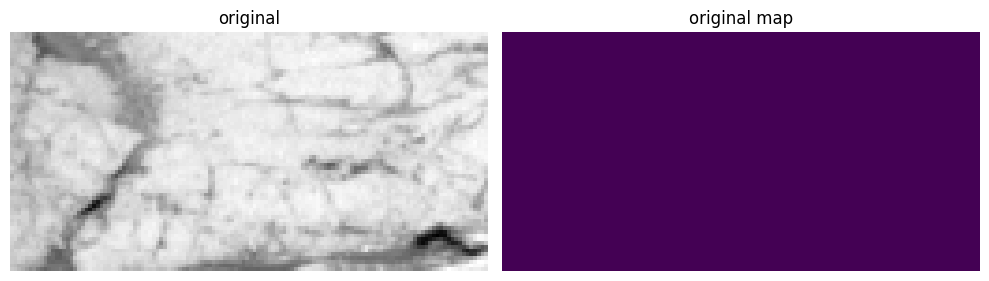

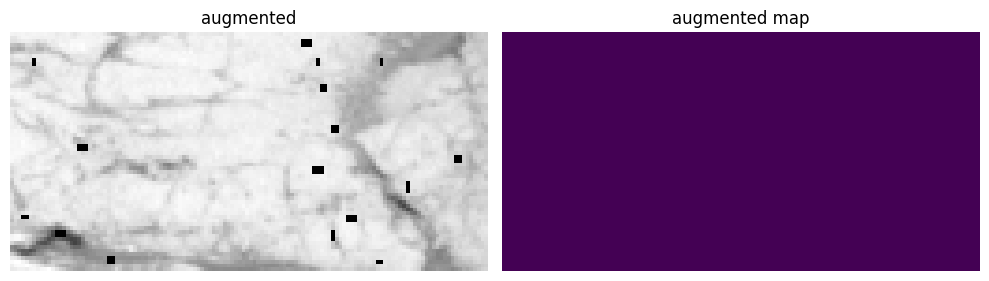

Sample 17:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 1.0
test pixel augmented:1.0 1.0 1.0


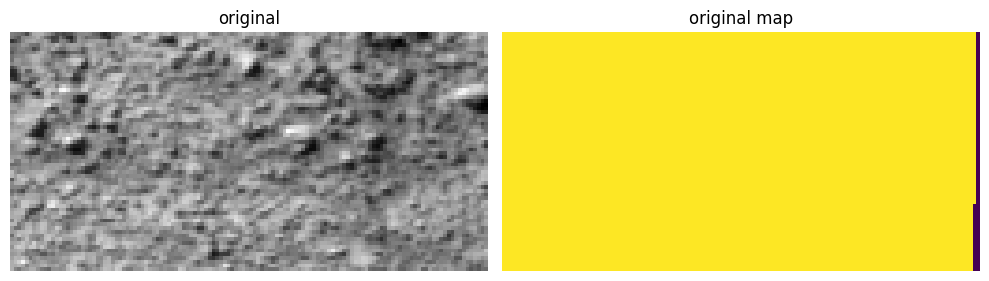

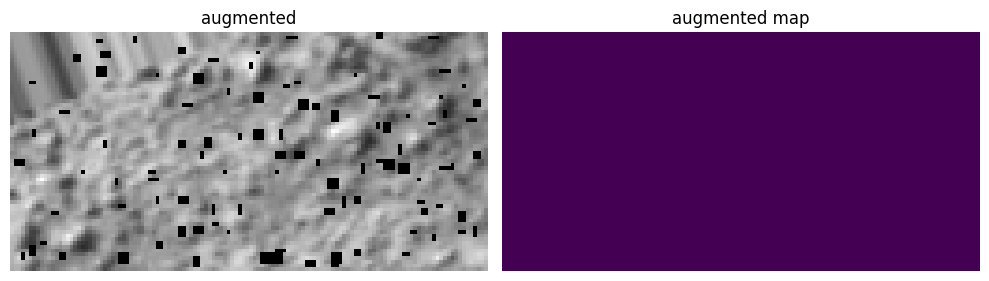

Sample 18:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:3.0 3.0 3.0
test pixel augmented:3.0 3.0 3.0


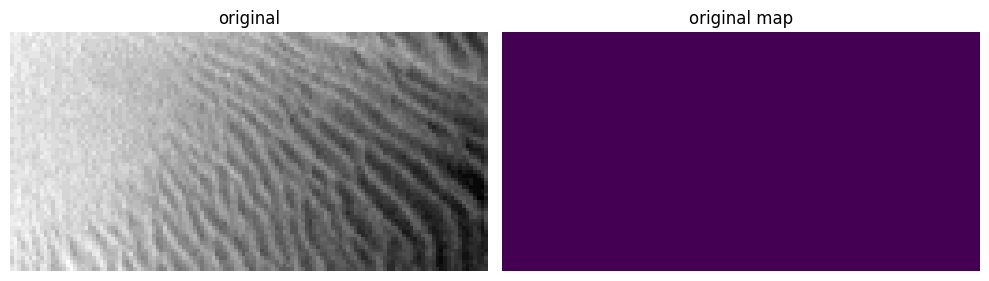

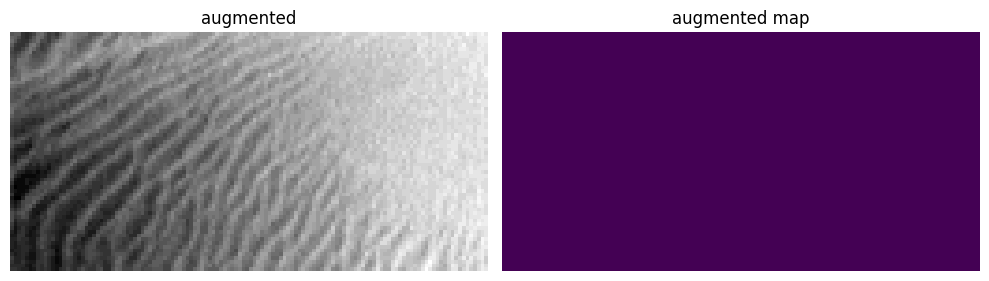

Sample 19:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:3.0 3.0 3.0
test pixel augmented:3.0 3.0 3.0


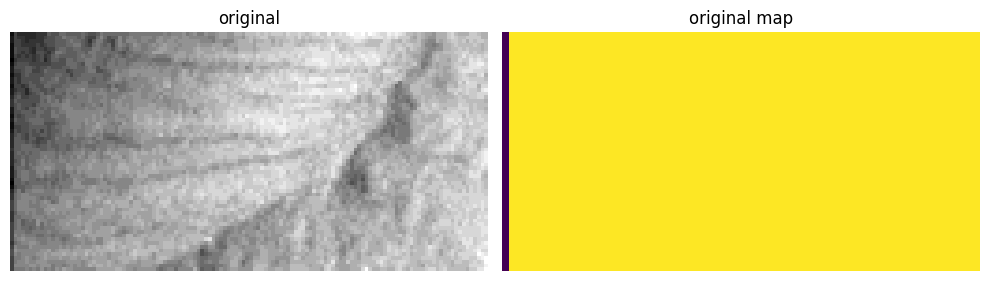

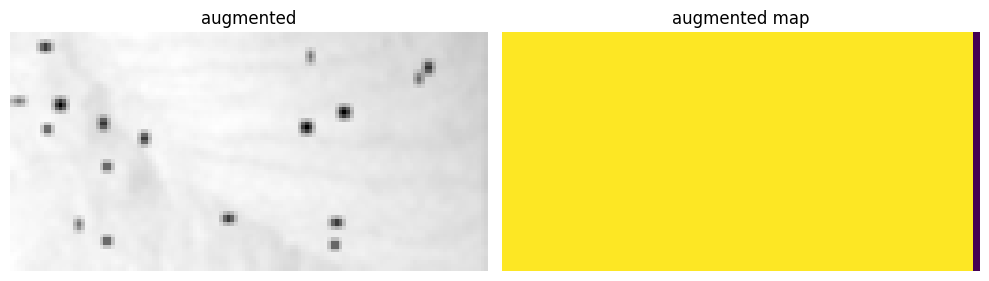

Sample 20:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 1.0
test pixel augmented:1.0 1.0 1.0


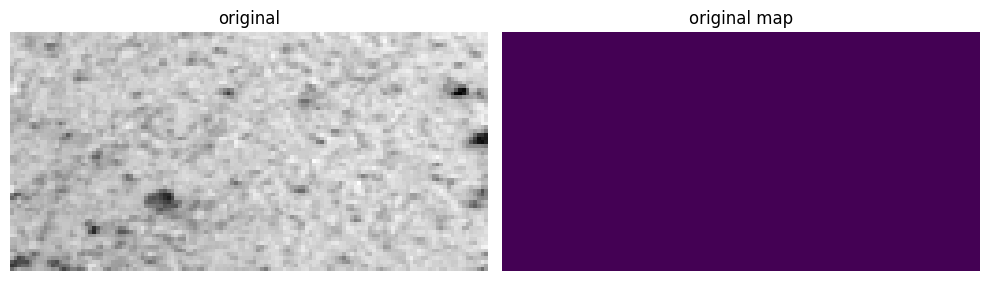

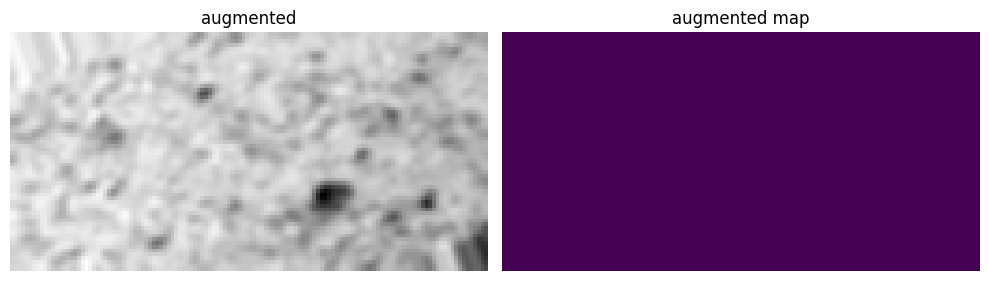

Sample 21:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:0.0 0.0 1.0
test pixel augmented:1.0 0.0 0.0


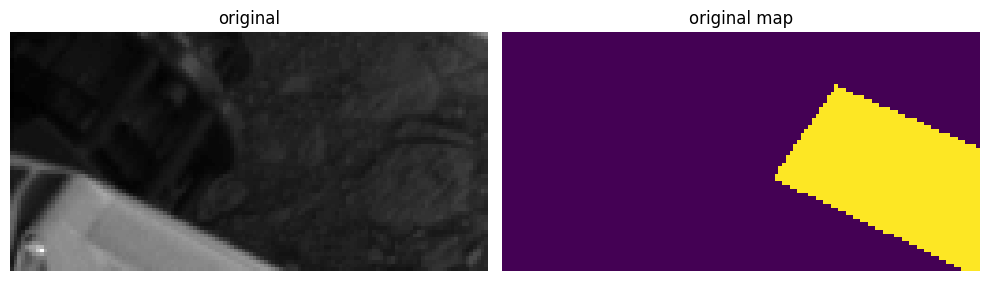

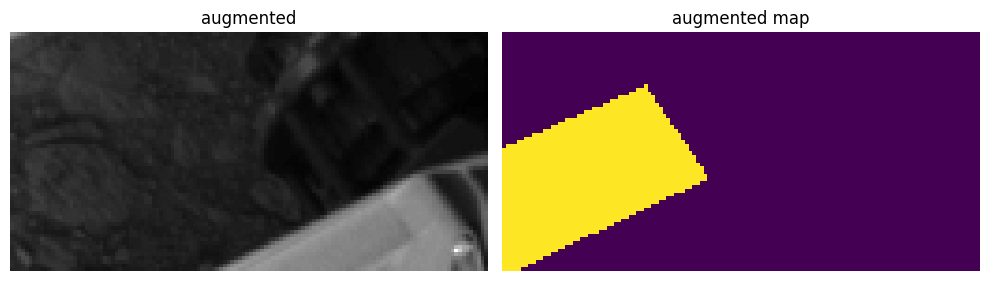

Sample 22:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:2.0 2.0 2.0
test pixel augmented:2.0 2.0 2.0


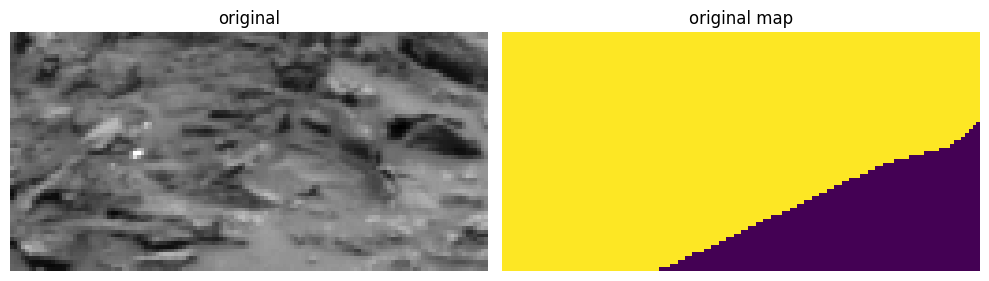

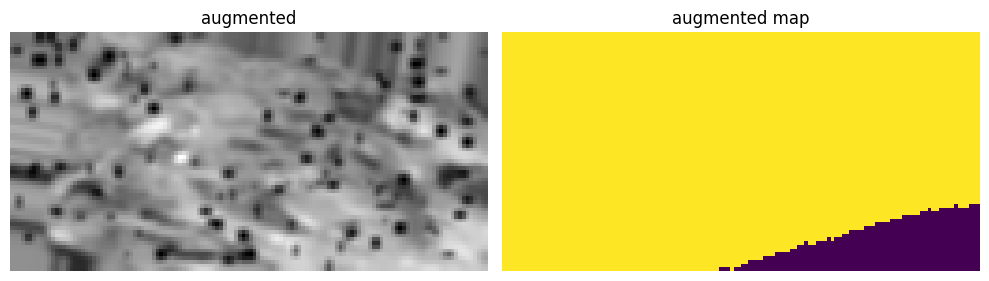

Sample 23:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 1.0
test pixel augmented:1.0 1.0 1.0


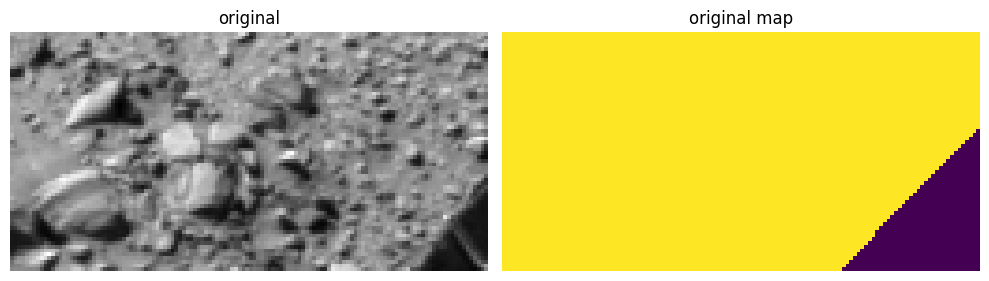

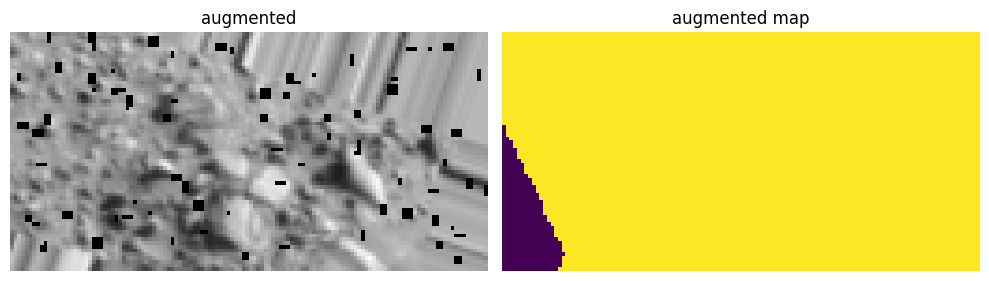

Sample 24:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:2.0 3.0 0.0
test pixel augmented:0.0 2.0 2.0


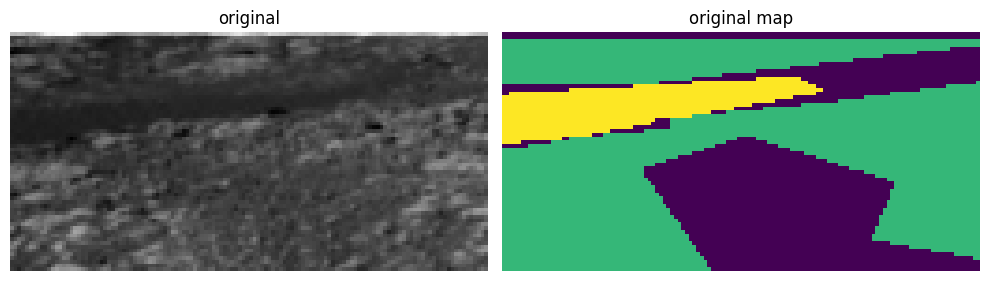

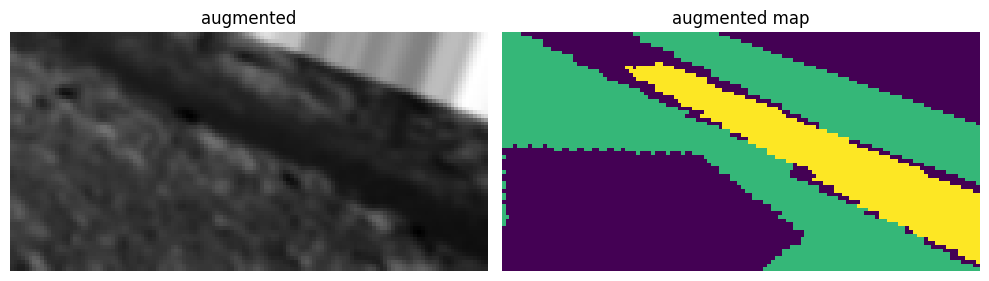

Sample 25:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:3.0 3.0 3.0
test pixel augmented:3.0 3.0 0.0


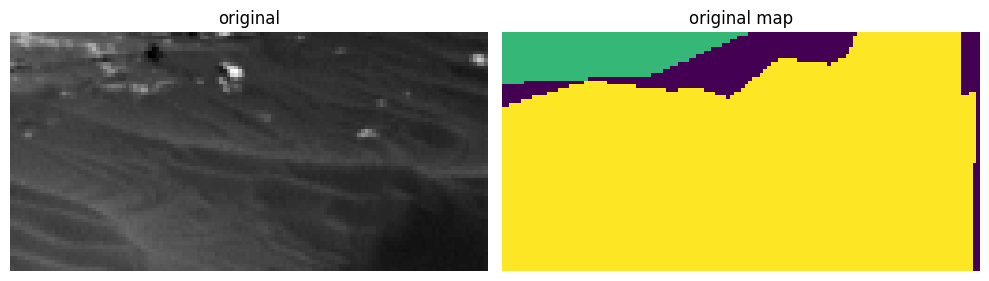

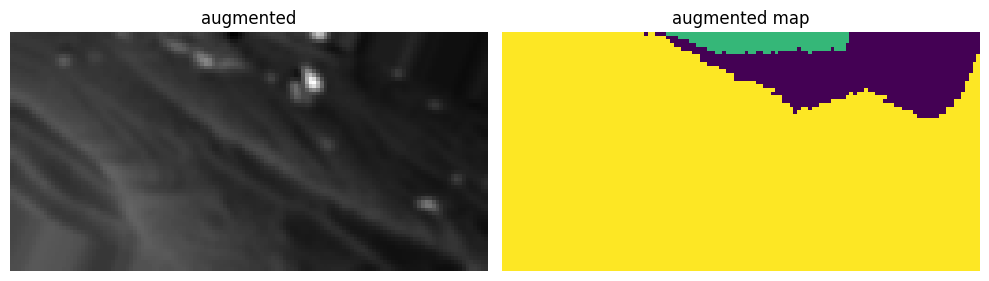

Sample 26:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:0.0 0.0 0.0
test pixel augmented:0.0 0.0 0.0


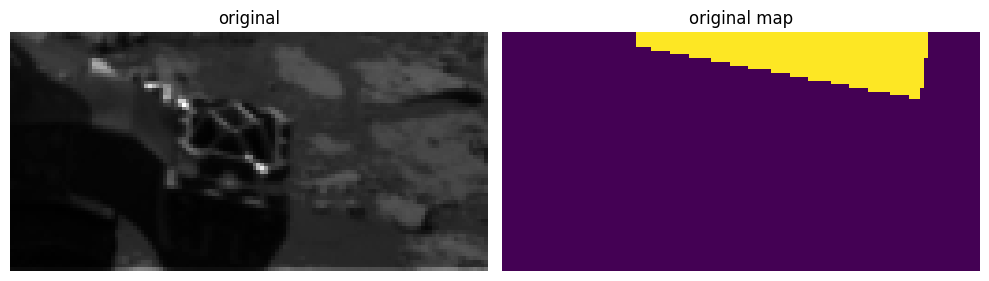

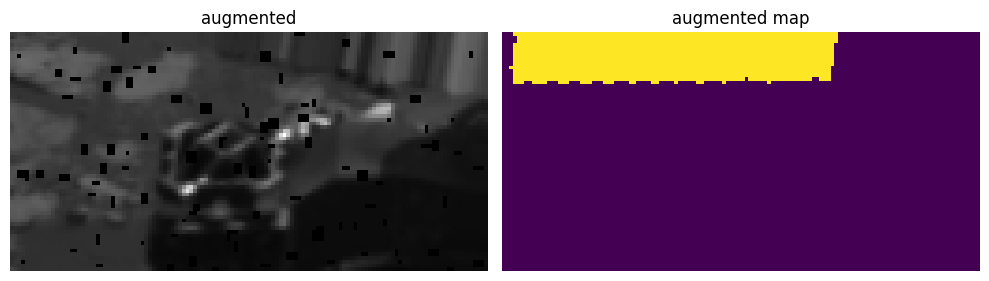

Sample 27:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 1.0
test pixel augmented:1.0 1.0 1.0


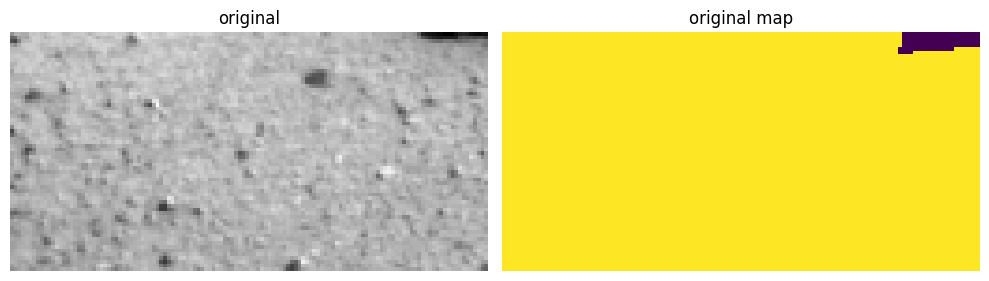

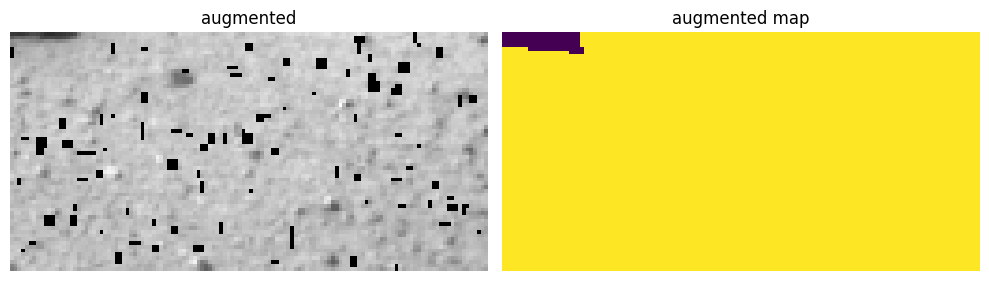

Sample 28:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:0.0 0.0 0.0
test pixel augmented:0.0 0.0 0.0


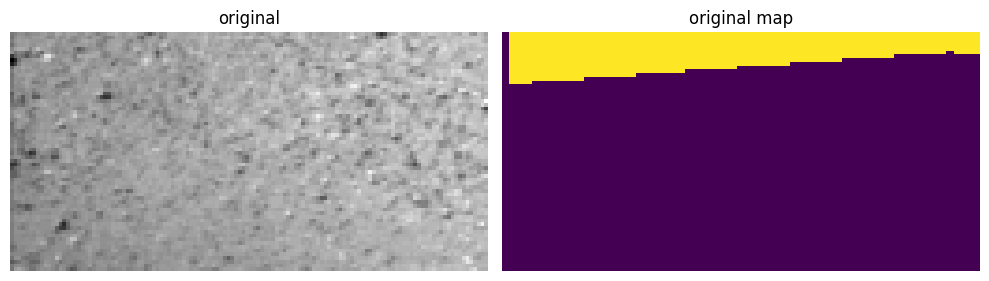

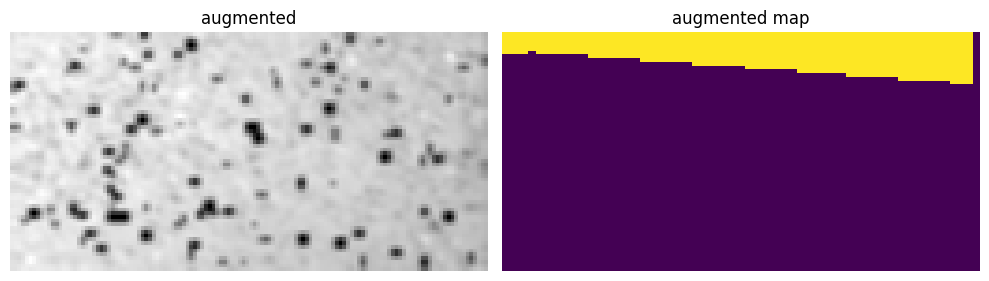

Sample 29:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:3.0 3.0 3.0
test pixel augmented:3.0 3.0 3.0


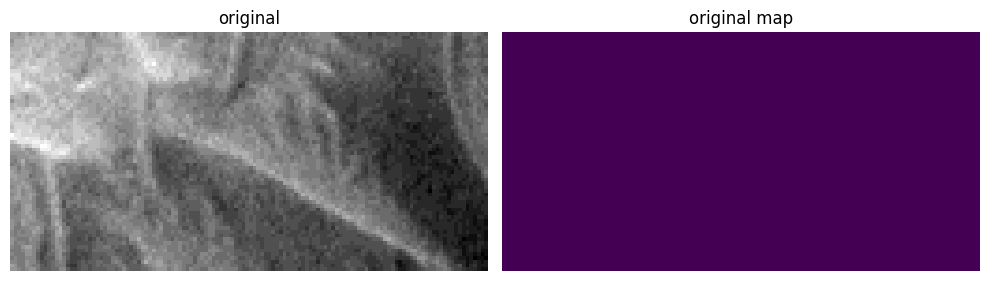

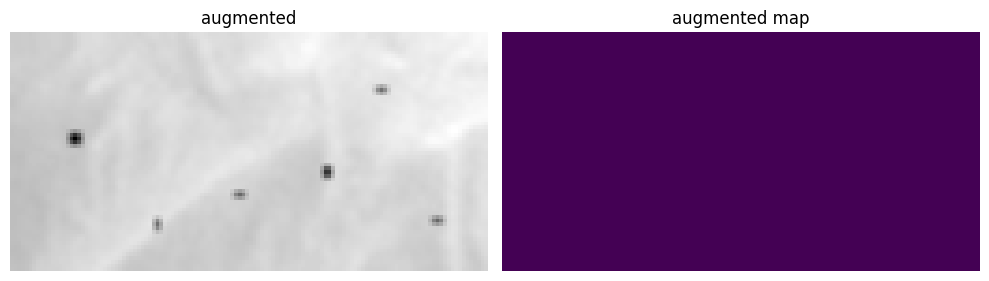

Sample 30:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:3.0 3.0 3.0
test pixel augmented:3.0 3.0 3.0


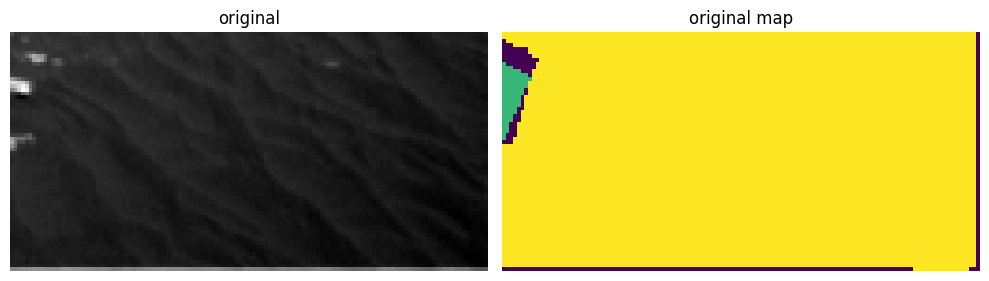

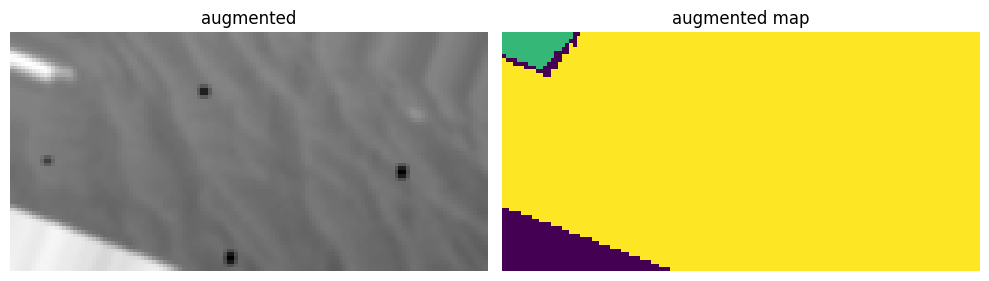

Sample 31:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 0.0 1.0
test pixel augmented:1.0 1.0 0.0


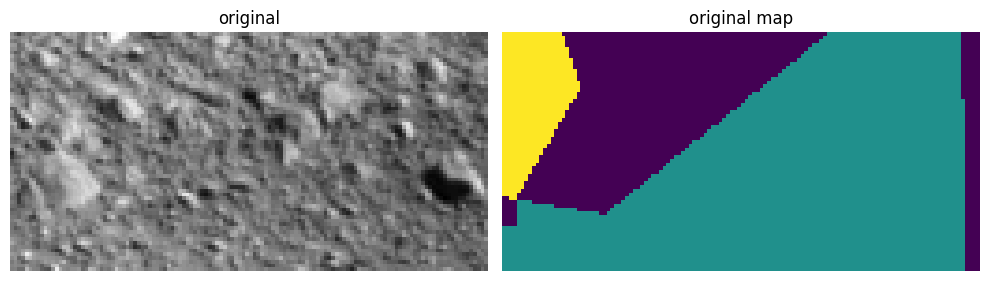

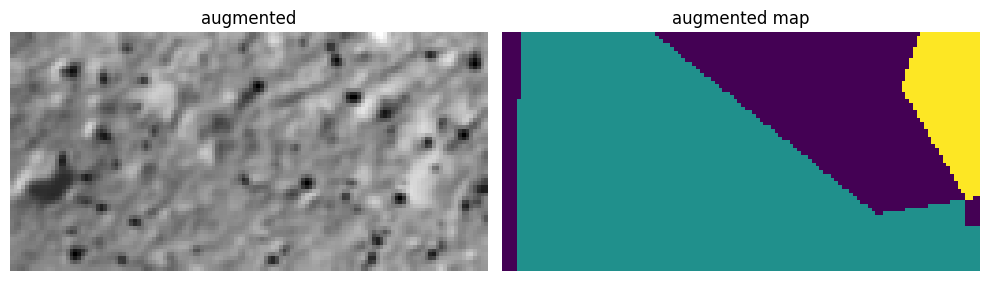

Sample 32:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:0.0 0.0 3.0
test pixel augmented:3.0 3.0 0.0


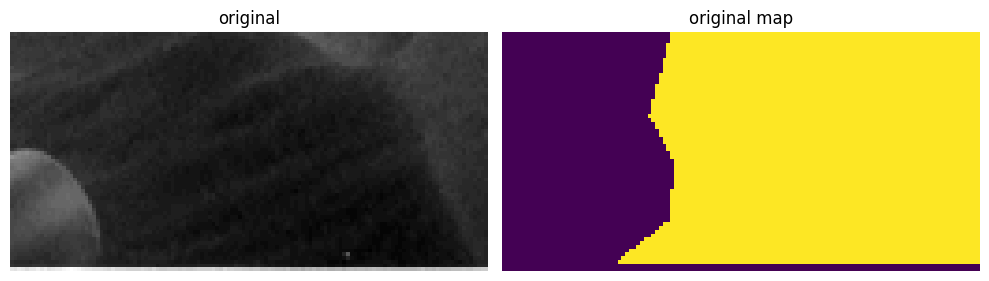

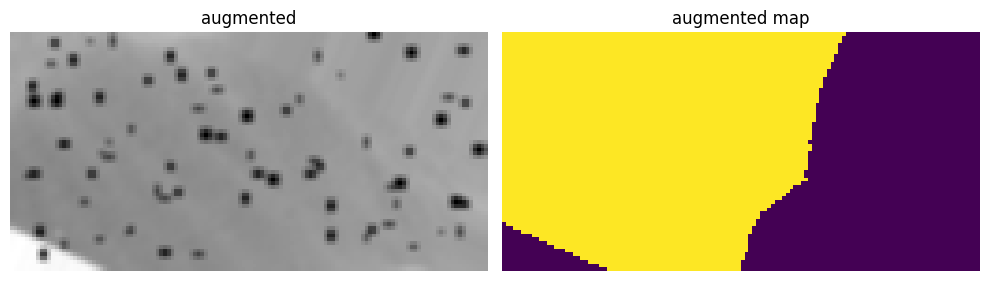

Sample 33:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 1.0
test pixel augmented:1.0 1.0 1.0


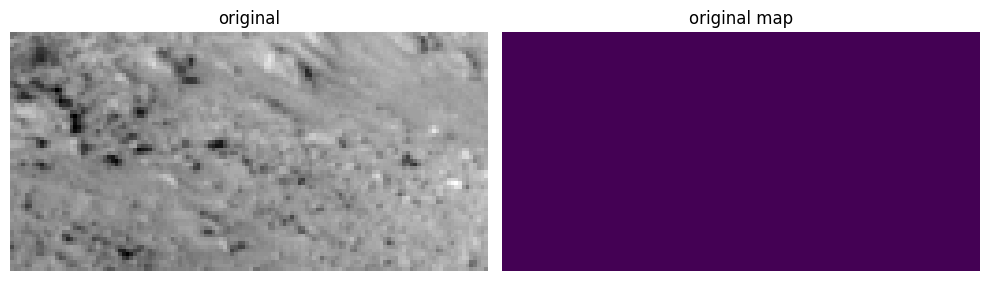

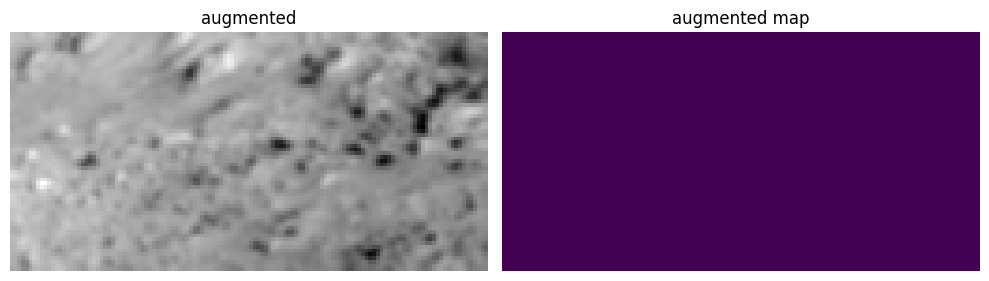

Sample 34:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:2.0 3.0 3.0
test pixel augmented:0.0 3.0 3.0


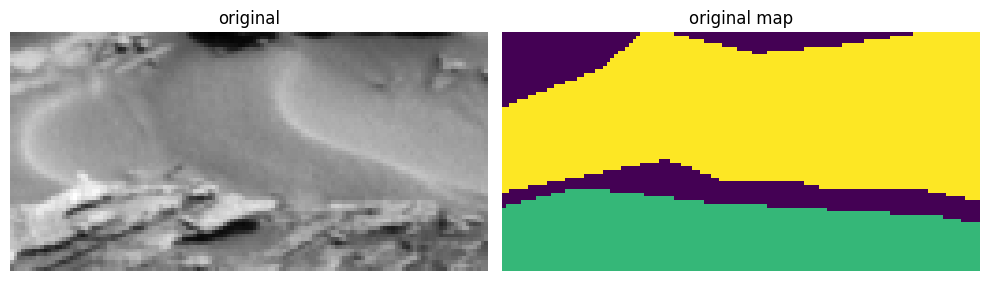

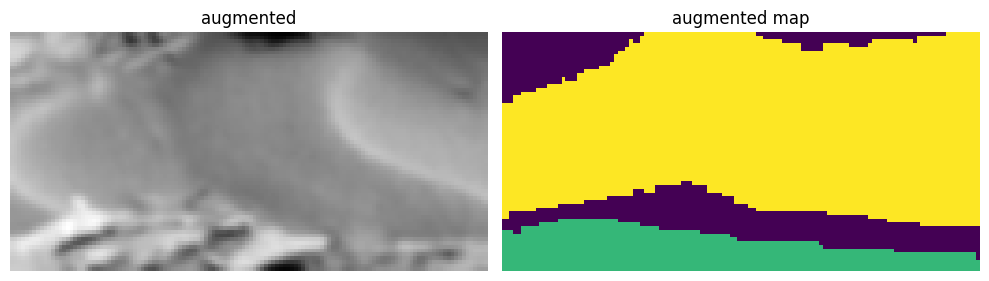

Sample 35:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:3.0 3.0 3.0
test pixel augmented:3.0 3.0 3.0


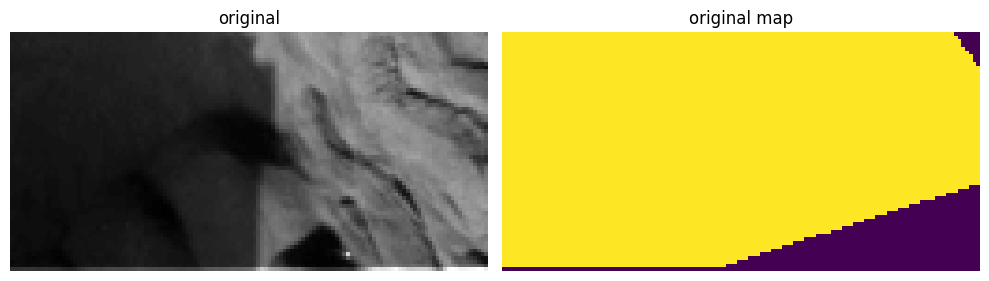

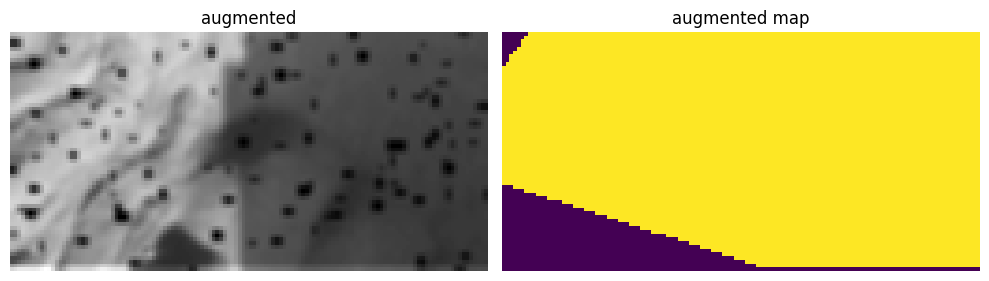

Sample 36:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:3.0 0.0 0.0
test pixel augmented:0.0 0.0 0.0


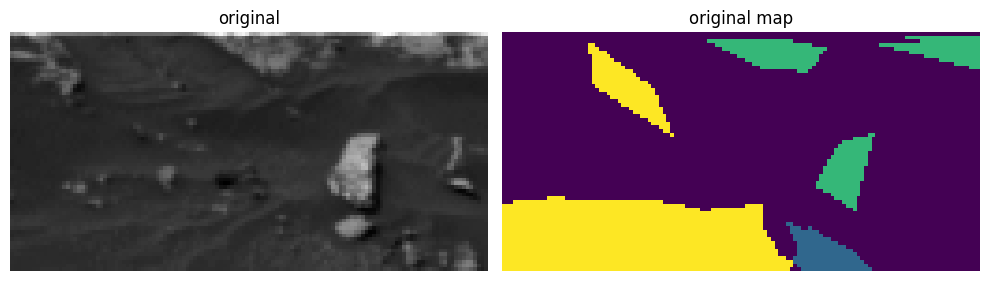

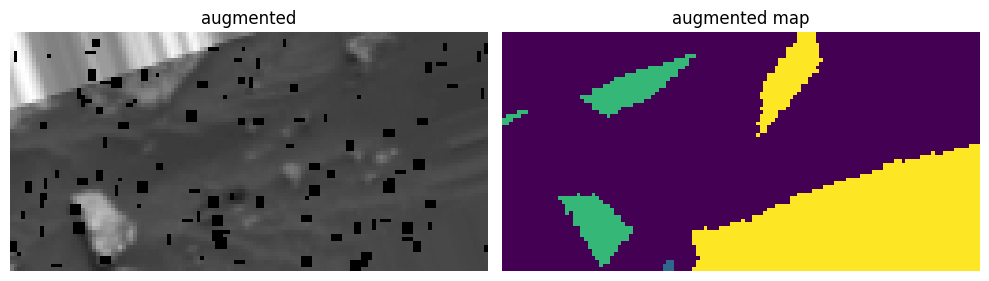

Sample 37:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 3.0
test pixel augmented:1.0 0.0 3.0


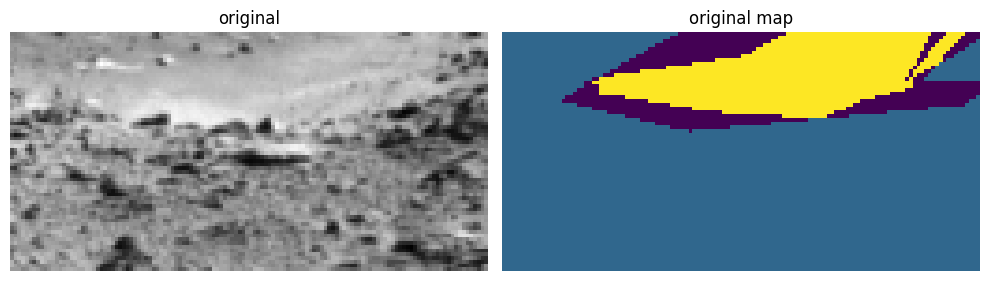

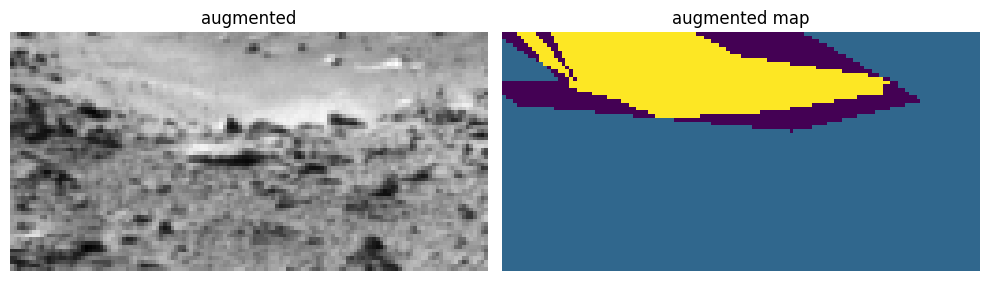

Sample 38:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:0.0 0.0 0.0
test pixel augmented:0.0 0.0 0.0


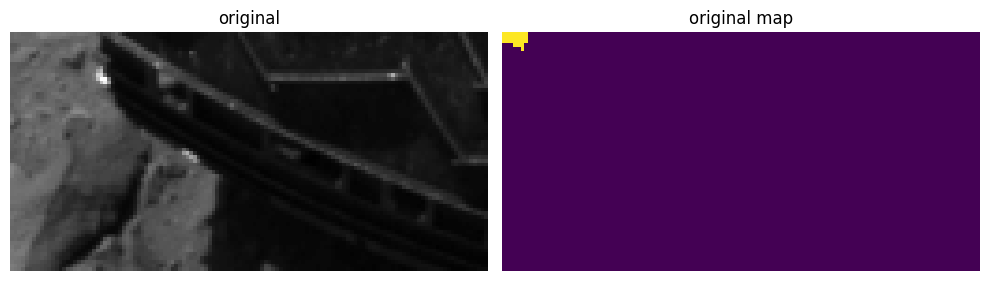

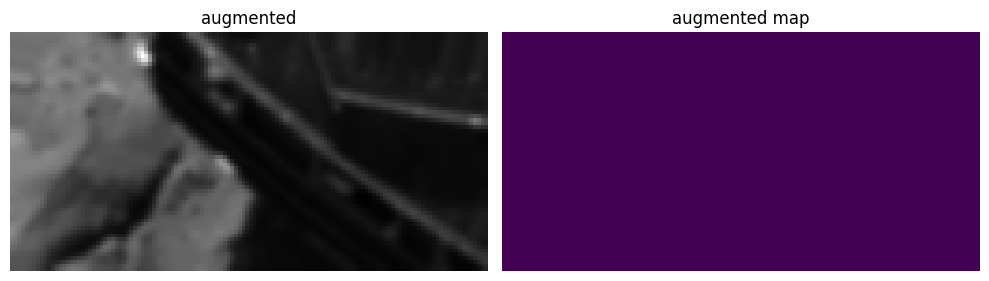

Sample 39:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:3.0 3.0 3.0
test pixel augmented:3.0 3.0 3.0


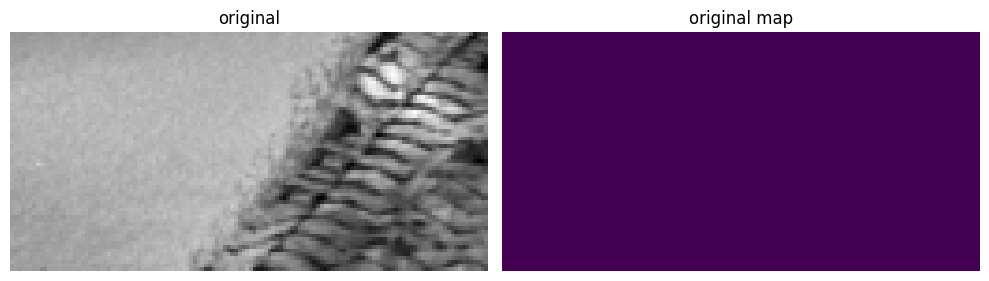

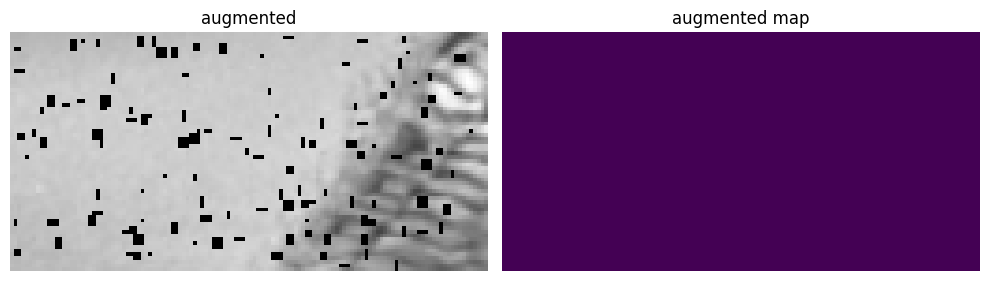

Sample 40:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 1.0
test pixel augmented:1.0 1.0 1.0


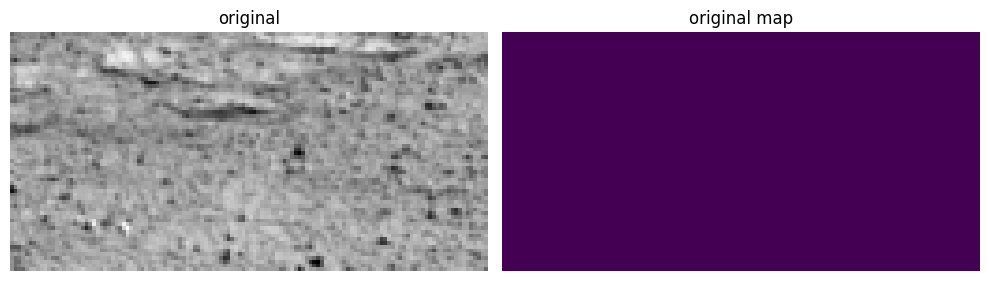

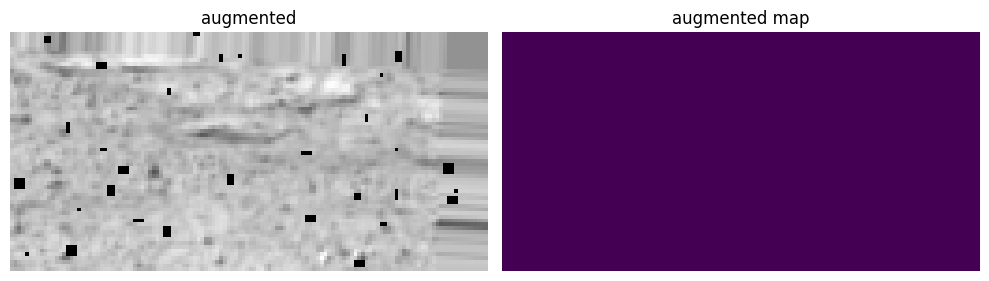

Sample 41:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:3.0 0.0 2.0
test pixel augmented:2.0 3.0 3.0


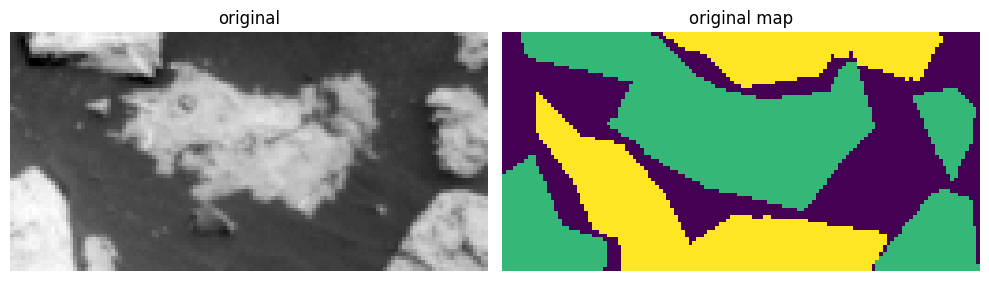

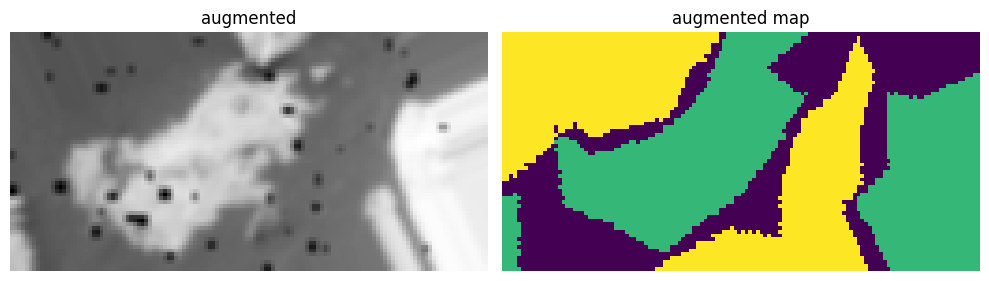

Sample 42:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:0.0 3.0 0.0
test pixel augmented:0.0 0.0 0.0


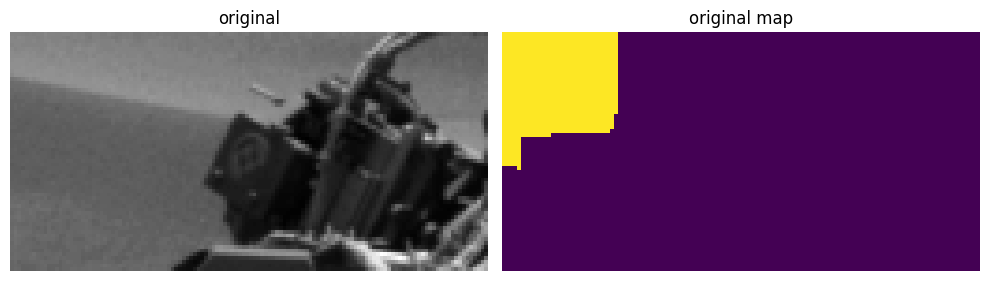

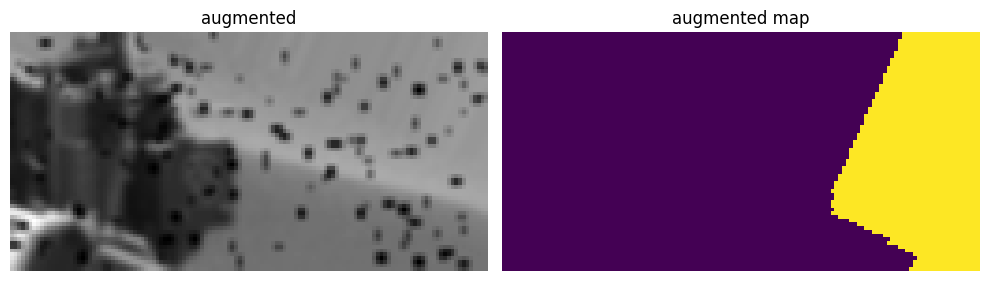

Sample 43:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:2.0 2.0 0.0
test pixel augmented:0.0 0.0 2.0


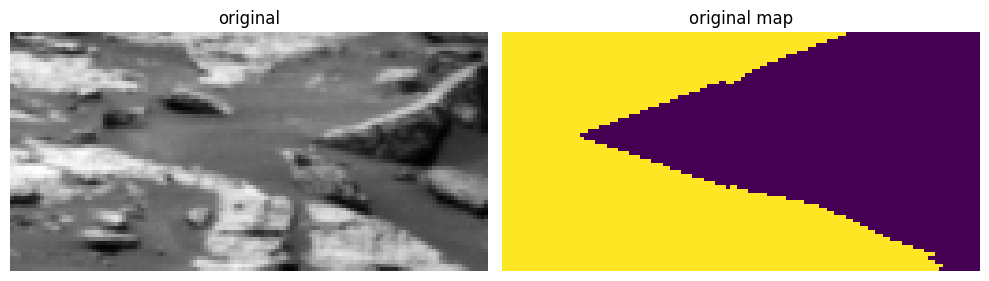

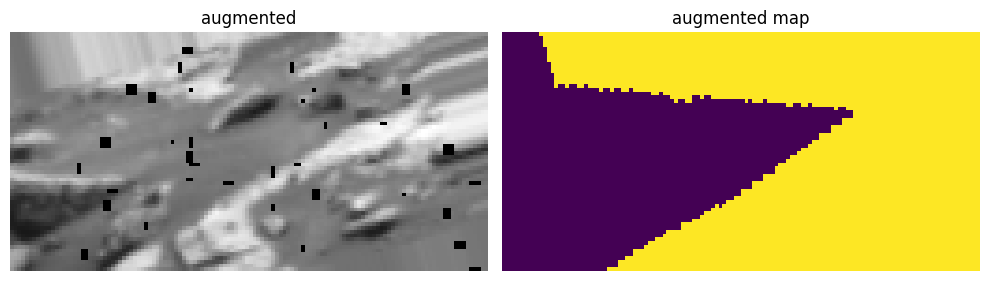

Sample 44:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 1.0
test pixel augmented:1.0 1.0 1.0


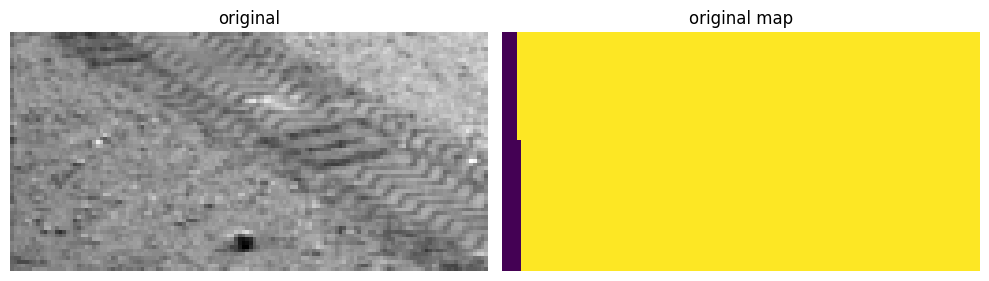

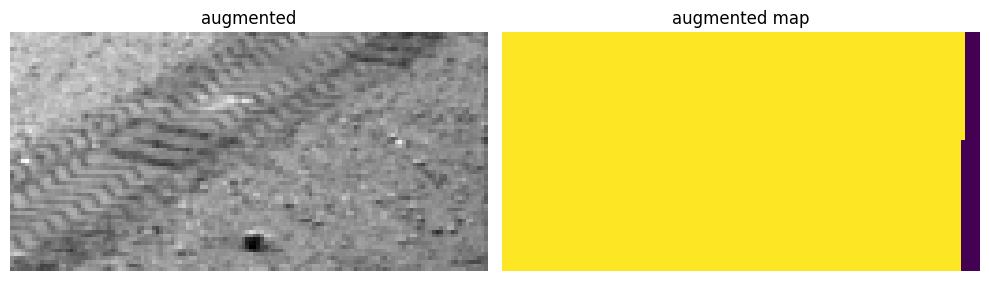

Sample 45:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 1.0
test pixel augmented:1.0 1.0 1.0


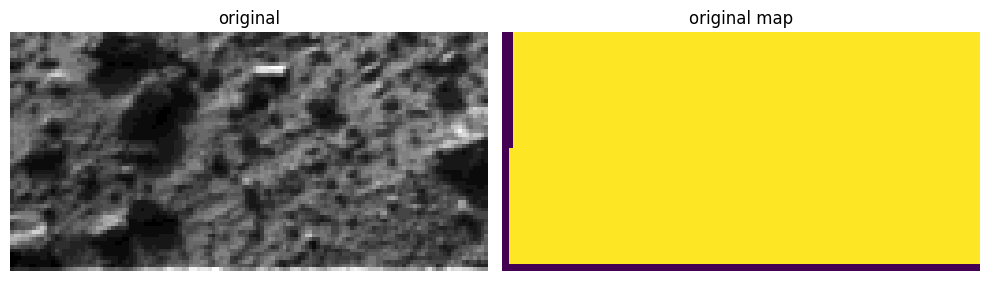

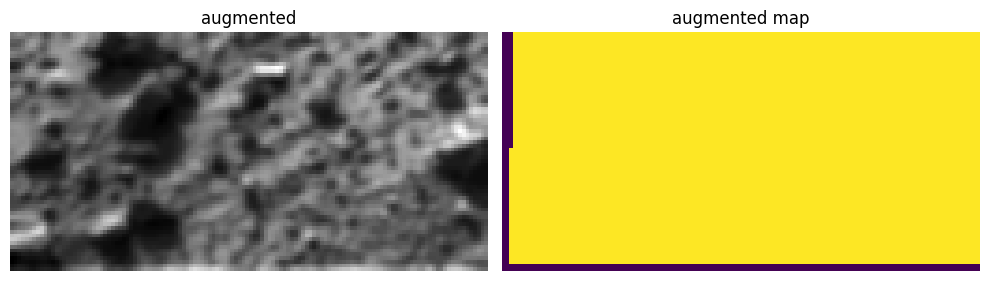

Sample 46:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:0.0 0.0 2.0
test pixel augmented:2.0 2.0 0.0


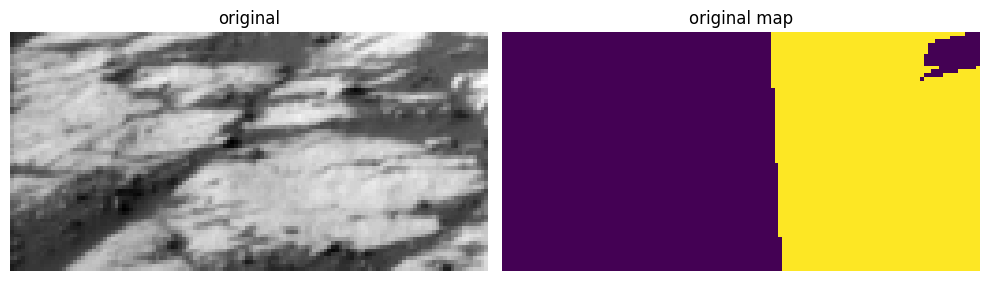

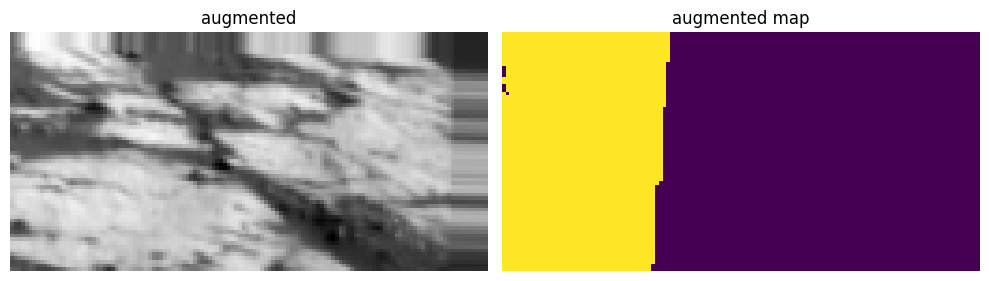

Sample 47:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:3.0 3.0 3.0
test pixel augmented:3.0 3.0 3.0


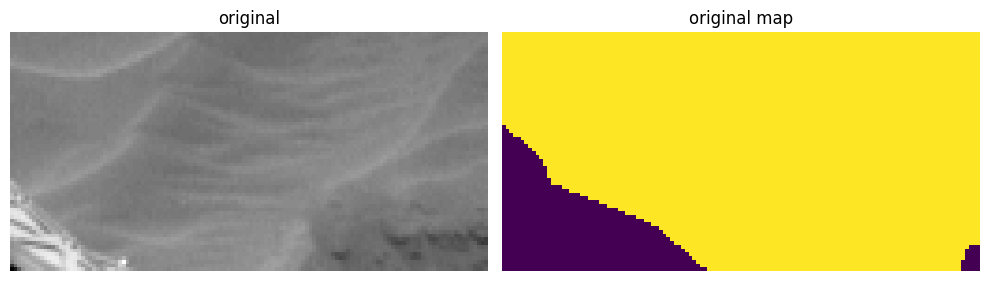

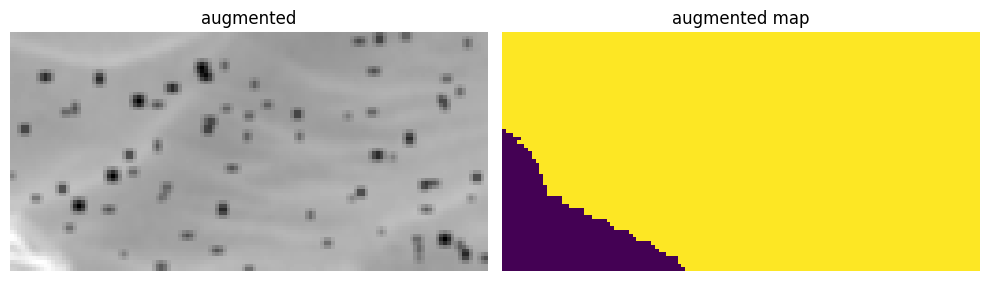

Sample 48:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:3.0 3.0 3.0
test pixel augmented:3.0 3.0 3.0


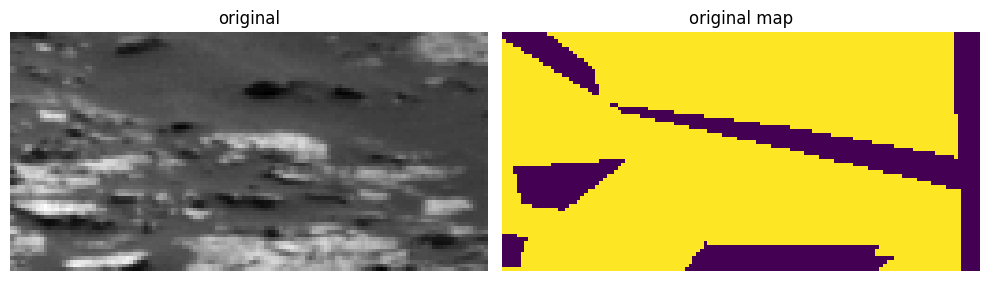

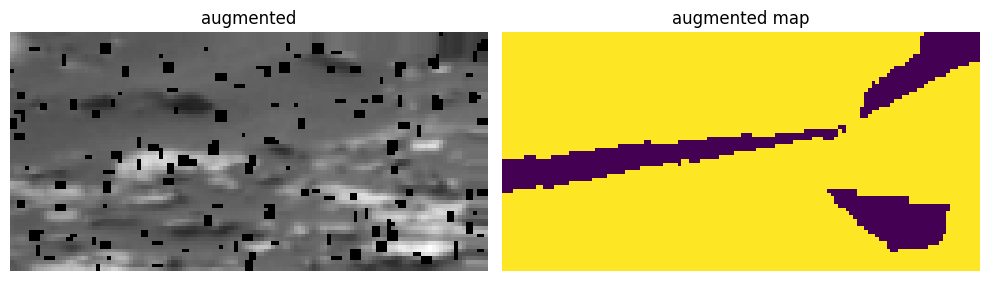

Sample 49:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:1.0 1.0 1.0
test pixel augmented:1.0 1.0 1.0


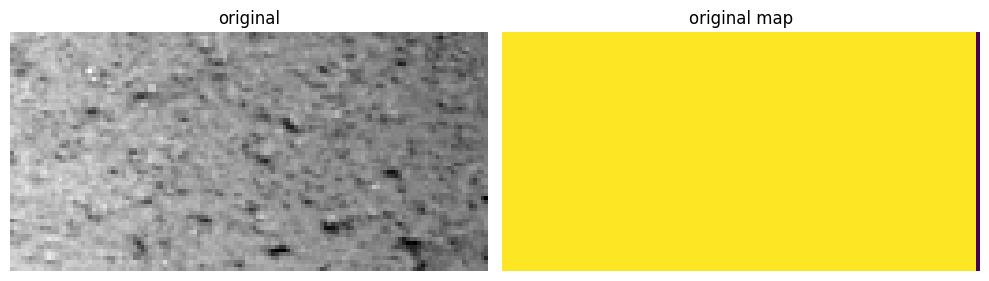

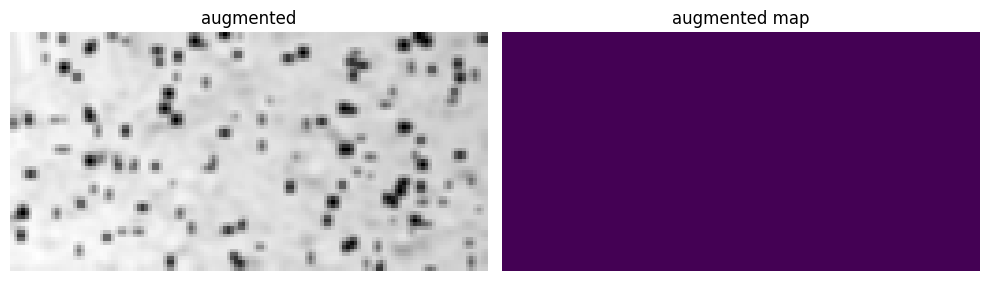

Sample 50:
Image original shape: (64, 128, 1)
Label original shape: (64, 128)
Image shape: (64, 128, 1)
Label shape: (64, 128)
test pixel:3.0 3.0 0.0
test pixel augmented:3.0 0.0 3.0


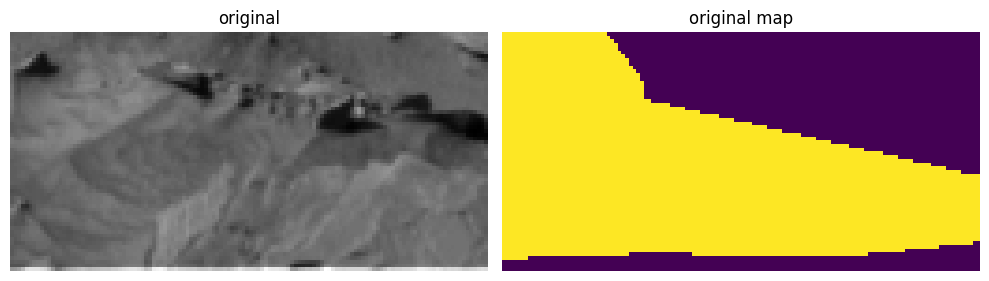

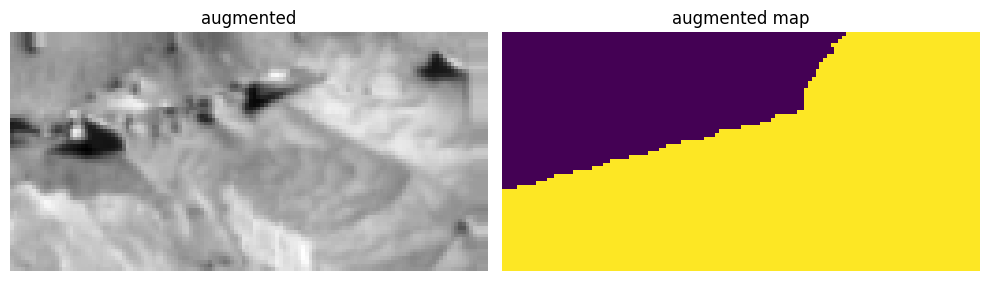

In [15]:
#display image
max_img = 50
for i, (img, label) in enumerate(zip(augmented_dataset[0], augmented_dataset[1])):
  if i >= max_img:  # Limita a massimo 50 iterazioni
        break

  print(f"Sample {i + 1}:")
  print(f"Image original shape: {X_train[i].shape}")
  print(f"Label original shape: {y_train[i].shape}")
  print(f"Image shape: {img.shape}")
  print(f"Label shape: {label.shape}")

  print("test pixel:" + str(y_train[i][45][40]) + " " + str(y_train[i][20][18]) + " " + str(y_train[i][16][91]))
  print("test pixel augmented:" + str(label[45][40]) + " " + str(label[20][18]) + " " + str(label[16][91]))
  display_aug(X_train[i], y_train[i], title="original")
  display_aug(img, label, title="augmented")

##merge dataset

In [16]:
import hashlib
def remove_duplicates(X_train, y_train):
    """
    Remove duplicate images based on hash values after merging the datasets.
    Prints duplicate images when found.
    Returns unique images and their corresponding labels.
    """
    unique_images = []
    unique_labels = []
    seen_hashes = set()

    for img, label in zip(X_train, y_train):
        # Hash the image to create a unique identifier
        img_hash = hashlib.md5(img.tobytes()).hexdigest()
        if img_hash not in seen_hashes:
            seen_hashes.add(img_hash)
            unique_images.append(img)
            unique_labels.append(label)
        else:
            # If the image is a duplicate, print the two identical images
            print("Duplicate found:")
            #print("Image: ", img)
            display_aug(img, label)
    return np.array(unique_images), np.array(unique_labels)

def merge_dataset(X_train, y_train, augmented_X_train, augmented_y_train, remove_duplicates=True):
    # Merge the datasets first
    merged_X_train = np.concatenate((X_train, augmented_X_train), axis=0)
    merged_y_train = np.concatenate((y_train, augmented_y_train), axis=0)

    # Remove duplicates from the merged dataset
    if(remove_duplicates):
      merged_X_train, merged_y_train = remove_duplicates(merged_X_train, merged_y_train)

    return merged_X_train, merged_y_train

x train len: 2254 y train len:2254
shapes: (2254, 64, 128, 1) (2254, 64, 128)
Duplicate found:


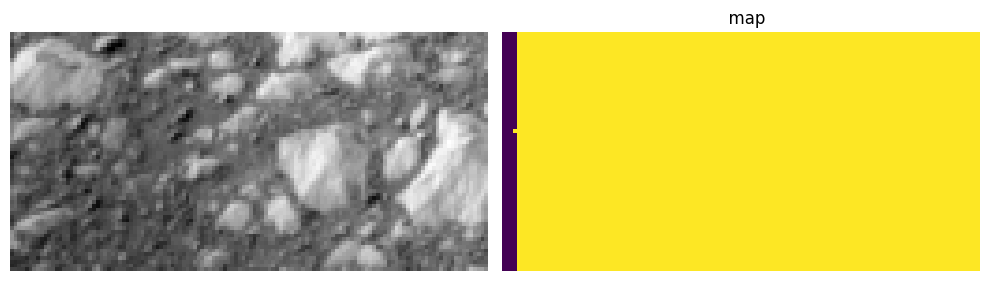

Duplicate found:


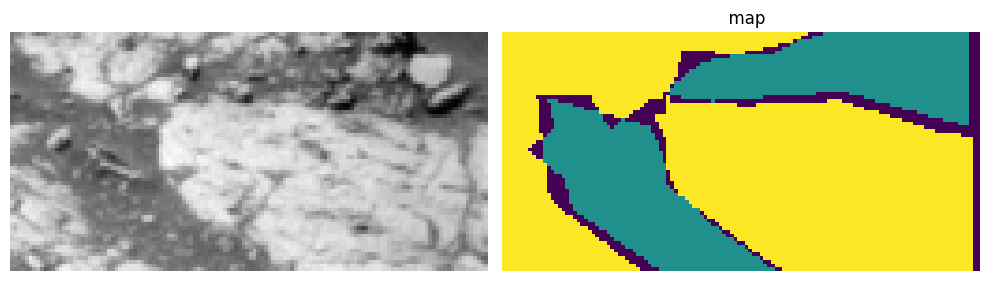

Duplicate found:


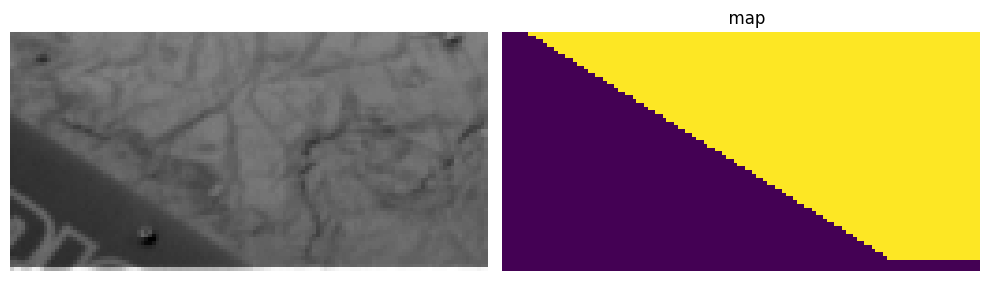

Duplicate found:


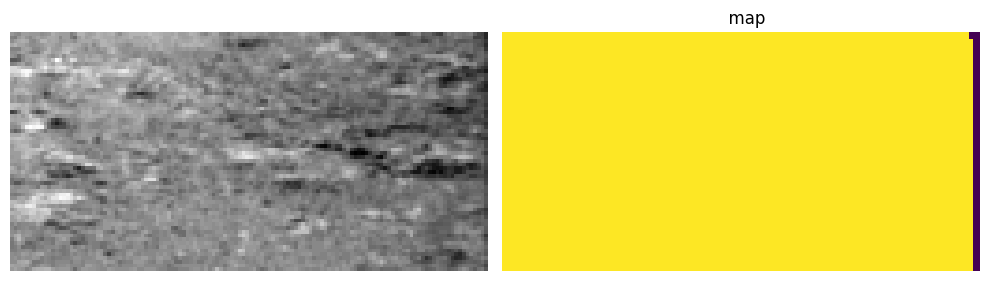

Duplicate found:


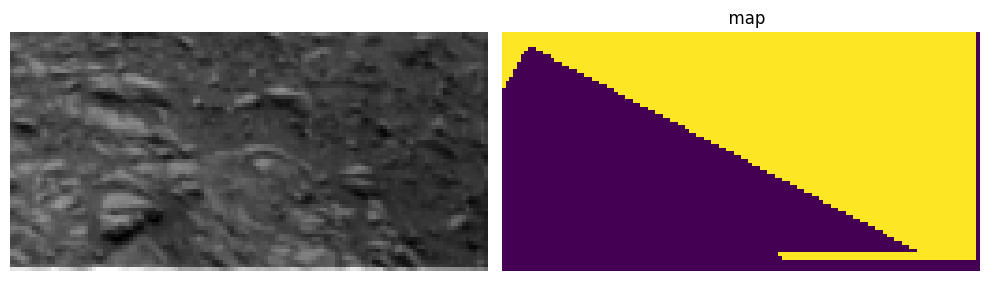

Duplicate found:


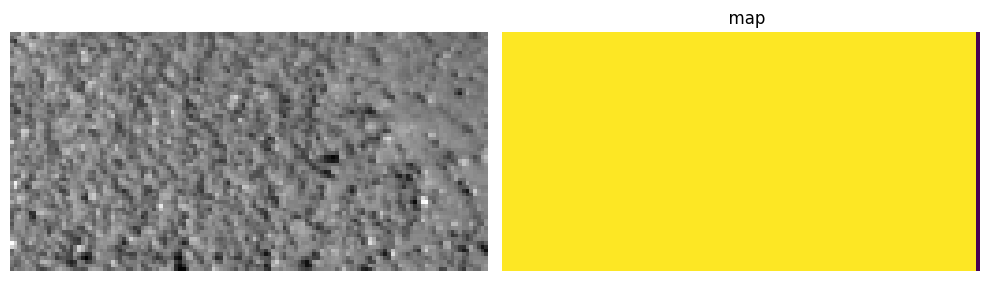

Duplicate found:


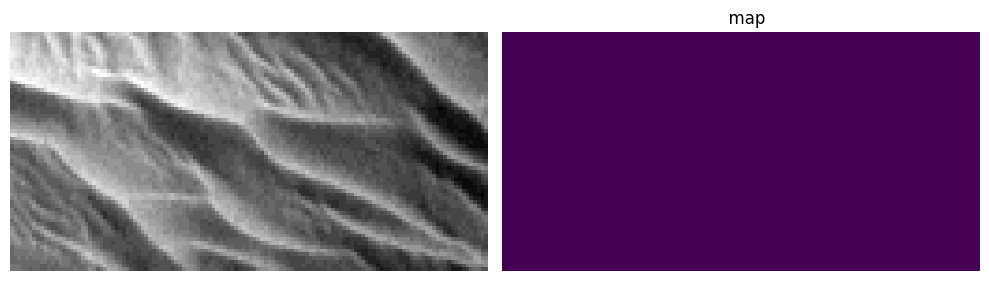

Duplicate found:


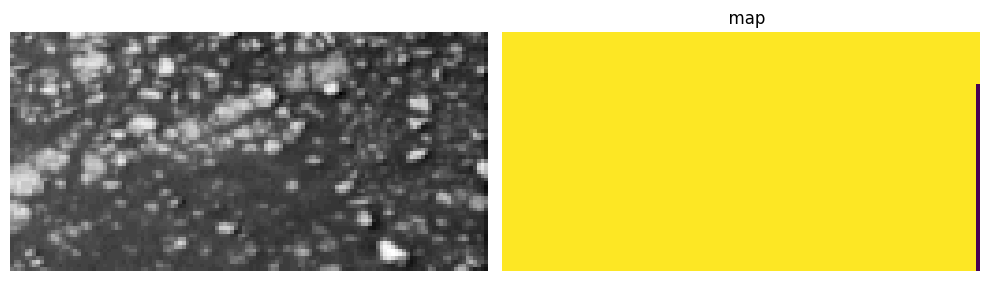

Duplicate found:


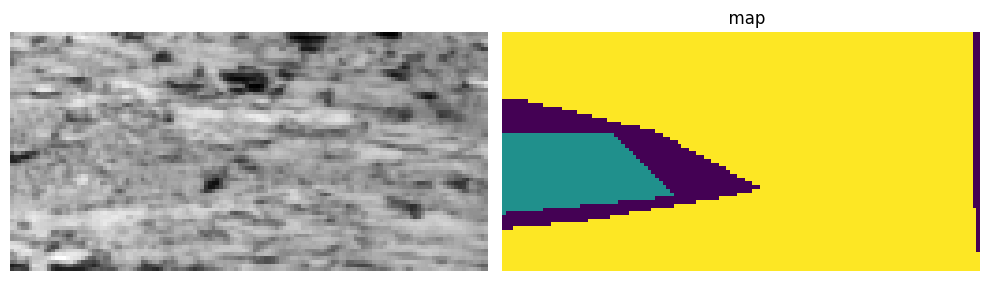

Duplicate found:


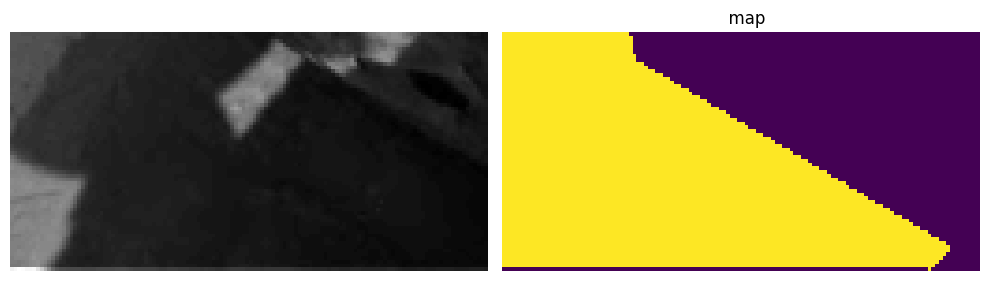

Duplicate found:


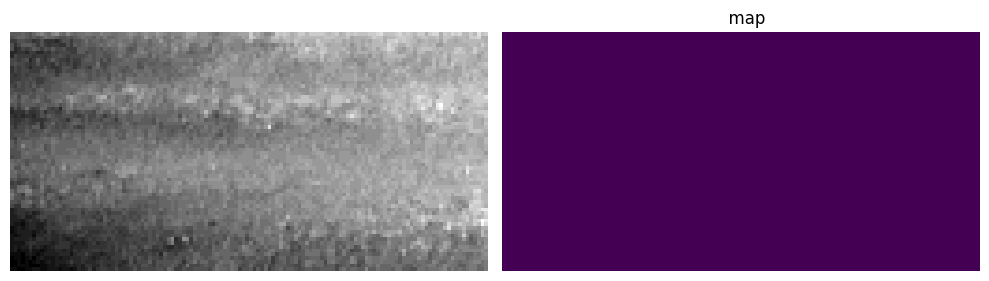

x train len augmented: 4497 y train len augmented: 4497
augmented shapes: (4497, 64, 128, 1) (4497, 64, 128)


In [17]:
print("x train len: " + str(len(X_train)) + " y train len:" + str(len(y_train)))
print("shapes: " + str(X_train.shape) + " " + str(y_train.shape))
merged_x_train, merged_y_train = merge_dataset(X_train, y_train, augmented_dataset[0], augmented_dataset[1], remove_duplicates)
print("x train len augmented: " + str(len(merged_x_train)) + " y train len augmented: " + str(len(merged_y_train)))
print("augmented shapes: " + str(merged_x_train.shape) + " " + str(merged_y_train.shape))


train_dataset = tf.data.Dataset.from_tensor_slices((merged_x_train, merged_y_train))

# Batch the datasets
train_dataset = train_dataset.batch(BATCH_SIZE)

# UNET

### UNET Definition

In [18]:
def unet_block(input_tensor, filters, kernel_size=3, activation='relu', stack=2, name=''):
    # Initialise the input tensor
    x = input_tensor

    # Apply a sequence of Conv2D, Batch Normalisation, and Activation layers for the specified number of stacks
    for i in range(stack):
        x = tfkl.Conv2D(filters, kernel_size=kernel_size, padding='same', name=name + 'conv' + str(i + 1))(x)
        x = tfkl.BatchNormalization(name=name + 'bn' + str(i + 1))(x)
        x = tfkl.Activation(activation, name=name + 'activation' + str(i + 1))(x)

    # Return the transformed tensor
    return x

In [19]:
def get_unet_model(input_shape=(64, 128, 1), num_classes=NUM_CLASSES, seed=seed):
    tf.random.set_seed(seed)
    input_layer = tfkl.Input(shape=input_shape, name='input_layer')

    # Downsampling path
    down_block_1 = unet_block(input_layer, 32, name='down_block1_')
    d1 = tfkl.MaxPooling2D()(down_block_1)

    down_block_2 = unet_block(d1, 64, name='down_block2_')
    d2 = tfkl.MaxPooling2D()(down_block_2)

    # Bottleneck
    bottleneck = unet_block(d2, 128, name='bottleneck')

    # Upsampling path
    u1 = tfkl.UpSampling2D()(bottleneck)
    u1 = tfkl.Concatenate()([u1, down_block_2])
    u1 = unet_block(u1, 64, name='up_block1_')

    u2 = tfkl.UpSampling2D()(u1)
    u2 = tfkl.Concatenate()([u2, down_block_1])
    u2 = unet_block(u2, 32, name='up_block2_')

    # Output Layer
    output_layer = tfkl.Conv2D(num_classes, kernel_size=1, padding='same', activation="softmax", name='output_layer')(u2)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='UNet')
    return model

In [20]:
# Define custom Mean Intersection Over Union metric
class MeanIntersectionOverUnion(tf.keras.metrics.MeanIoU):
    def __init__(self, num_classes, labels_to_exclude=None, name="mean_iou", dtype=None):
        super(MeanIntersectionOverUnion, self).__init__(num_classes=num_classes, name=name, dtype=dtype)
        if labels_to_exclude is None:
            labels_to_exclude = [0]  # Default to excluding label 0
        self.labels_to_exclude = labels_to_exclude

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convert predictions to class labels
        y_pred = tf.math.argmax(y_pred, axis=-1)

        # Flatten the tensors
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.reshape(y_pred, [-1])

        # Apply mask to exclude specified labels
        for label in self.labels_to_exclude:
            mask = tf.not_equal(y_true, label)
            y_true = tf.boolean_mask(y_true, mask)
            y_pred = tf.boolean_mask(y_pred, mask)

        # Update the state
        return super().update_state(y_true, y_pred, sample_weight)

### Custom loss function with class weighting

In [21]:
from collections import Counter

def compute_class_weights(label_images, num_classes):
    """
    Compute class weights given a dataset of label images.

    Args:
    - label_images: List or array of 2D label images (grayscale).
    - num_classes: Total number of classes.

    Returns:
    - class_weights: Array of weights for each class.
    """
    # Flatten all label images to count occurrences of each class
    all_labels = np.concatenate([img.flatten() for img in label_images])

    # Count occurrences of each class
    class_counts = Counter(all_labels)

    # Compute total number of pixels
    total_pixels = sum(class_counts.values())

    # Calculate weights (inverse frequency)
    class_weights = []
    for i in range(num_classes):
        if i in class_counts:
            frequency = class_counts[i] / total_pixels
            class_weights.append(1.0 / frequency)
        else:
            # Assign a very high weight to classes not present in the data
            class_weights.append(0.0)

    # Normalize weights to make them relative
    class_weights = np.array(class_weights)
    class_weights /= np.sum(class_weights)

    return class_weights

In [22]:
def weighted_sparse_categorical_crossentropy(class_weights):
    def loss(y_true, y_pred):
        # Ensure y_true is an integer tensor
        y_true = tf.cast(y_true, tf.int32)

        # Compute the sparse categorical crossentropy loss
        scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
        loss = scce(y_true, y_pred)

        # Extract weights for each pixel based on y_true
        weights = tf.gather(class_weights, y_true)
        weights = tf.cast(weights, tf.float32)

        # Apply weights to the loss
        weighted_loss = loss * weights

        # Return mean loss across all pixels
        return tf.reduce_mean(weighted_loss)

    return loss

def dice_loss(y_true, y_pred, smooth=1):
    """
    Dice Loss function for semantic segmentation.

    Args:
    - y_true: Ground truth labels.
    - y_pred: Predicted logits.

    Returns:
    - Dice loss value.
    """
    # One-hot encode y_true to match y_pred shape
    y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=y_pred.shape[-1])
    y_true = tf.cast(y_true, tf.float32)

    # Convert logits to probabilities using softmax
    y_pred = tf.nn.softmax(y_pred, axis=-1)

    # Calculate intersection and union
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2])
    union = tf.reduce_sum(y_true + y_pred, axis=[1, 2])

    # Compute dice coefficient
    dice = (2. * intersection + smooth) / (union + smooth)

    # Dice loss is 1 - dice coefficient
    return 1 - tf.reduce_mean(dice)

def combined_loss(class_weights):
    """
    Combines weighted cross-entropy loss and Dice loss.

    Args:
    - class_weights: A list or tensor of weights for each class.

    Returns:
    - Combined loss function.
    """
    # Define the weighted cross-entropy loss
    wce_loss = weighted_sparse_categorical_crossentropy(class_weights)

    def loss(y_true, y_pred):
        # Compute weighted cross-entropy loss
        wce = wce_loss(y_true, y_pred)

        # Compute dice loss
        dice = dice_loss(y_true, y_pred)

        # Combine losses (you can adjust weights for each loss component)
        return 0.5 * wce + 0.5 * dice

    return loss

In [23]:
class_weights = compute_class_weights(y_train, NUM_CLASSES)

print(class_weights)

[0.00557152 0.0040129  0.00579897 0.00752068 0.97709593]


### Define model

Model: "UNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer            │ (None, 64, 128, 1)   │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_conv1      │ (None, 64, 128, 32)  │          320 │ input_layer[0][0]   │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_bn1        │ (None, 64, 128, 32)  │          128 │ down_block1_conv1[… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_activatio… │ (None, 64, 128, 32)  │            0 │ down_block1_bn1[0]… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_conv2      │ (None, 64, 128, 32)  │        9,248 │ down_block1_activa… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_bn2        │ (None, 64, 128, 32)  │          128 │ down_block1_conv2[… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_activatio… │ (None, 64, 128, 32)  │            0 │ down_block1_bn2[0]… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ max_pooling2d          │ (None, 32, 64, 32)   │            0 │ down_block1_activa… │    -    │
│ (MaxPooling2D)         │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block2_conv1      │ (None, 32, 64, 64)   │       18,496 │ max_pooling2d[0][0] │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block2_bn1        │ (None, 32, 64, 64)   │          256 │ down_block2_conv1[… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block2_activatio… │ (None, 32, 64, 64)   │            0 │ down_block2_bn1[0]… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block2_conv2      │ (None, 32, 64, 64)   │       36,928 │ down_block2_activa… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block2_bn2        │ (None, 32, 64, 64)   │          256 │ down_block2_conv2[… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├──────────────────────

 Total params: 473,669 (1.81 MB)

 Trainable params: 472,389 (1.80 MB)

 Non-trainable params: 1,280 (5.00 KB)

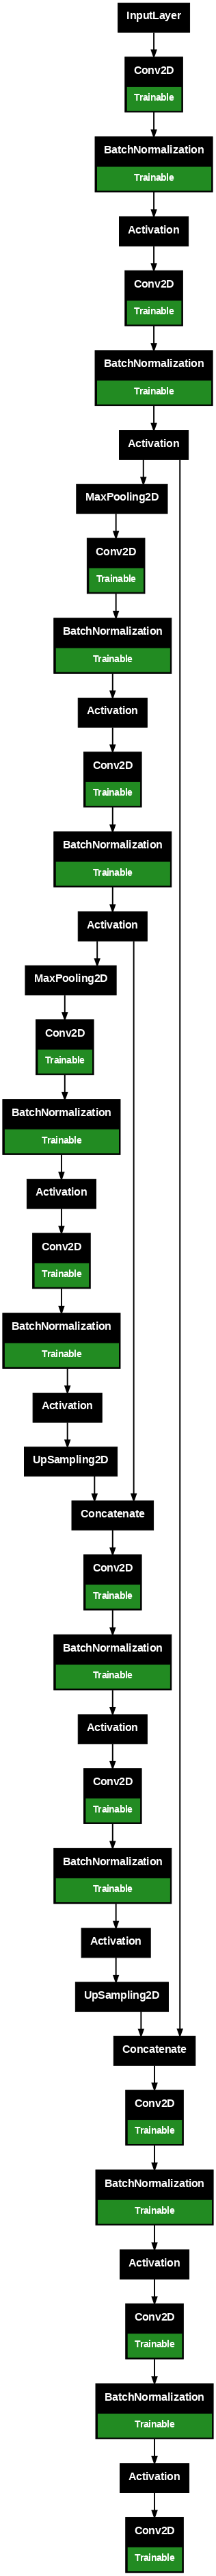

In [24]:
model = get_unet_model()

# Print a detailed summary of the model with expanded nested layers and trainable parameters.
model.summary(expand_nested=True, show_trainable=True)

# Generate and display a graphical representation of the model architecture.
tf.keras.utils.plot_model(model, show_trainable=True, expand_nested=True, dpi=70)

In [25]:
# Compile the model
print("Compiling model...")
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    #loss=combined_loss(class_weights),
    optimizer=tf.keras.optimizers.AdamW(LEARNING_RATE),
    metrics=["accuracy", MeanIntersectionOverUnion(num_classes=NUM_CLASSES, labels_to_exclude=[0])]
)
print("Model compiled!")

Compiling model...
Model compiled!


In [26]:
# Setup callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=PATIENCE,
    restore_best_weights=True
)

### Train

In [27]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=val_dataset,
    callbacks=[early_stopping],
    verbose=1
).history

# Calculate and print the final validation accuracy
final_val_meanIoU = round(max(history['val_mean_iou'])* 100, 2)
print(f'Final validation Mean Intersection Over Union: {final_val_meanIoU}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'UNet_'+str(final_val_meanIoU)+'.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

Epoch 1/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 43s 166ms/step - accuracy: 0.3778 - loss: 1.5015 - mean_iou: 0.1616 - val_accuracy: 0.2098 - val_loss: 2.0321 - val_mean_iou: 0.0547
Epoch 2/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5506 - loss: 1.1656 - mean_iou: 0.2710 - val_accuracy: 0.2100 - val_loss: 2.3316 - val_mean_iou: 0.0547
Epoch 3/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.5899 - loss: 1.0738 - mean_iou: 0.3051 - val_accuracy: 0.3188 - val_loss: 1.6264 - val_mean_iou: 0.1173
Epoch 4/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.6084 - loss: 1.0196 - mean_iou: 0.3240 - val_accuracy: 0.5408 - val_loss: 1.1592 - val_mean_iou: 0.2778
Epoch 5/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.6217 - loss: 0.9824 - mean_iou: 0.3379 - val_accuracy: 0.6319 - val_loss: 0.9832 - val_mean_iou: 0.3431
Epoch 6/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.6307 - loss: 0.9549 - mean_iou: 0.3466 - val_accuracy: 0.5969 - val_lo

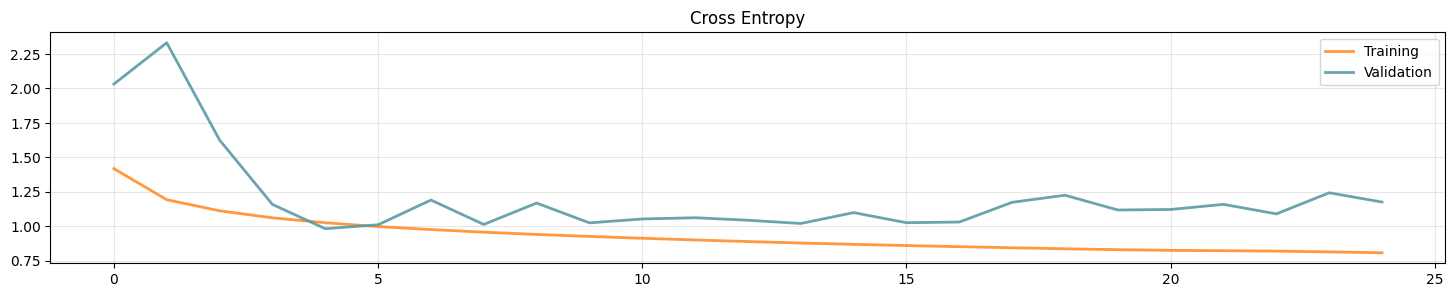

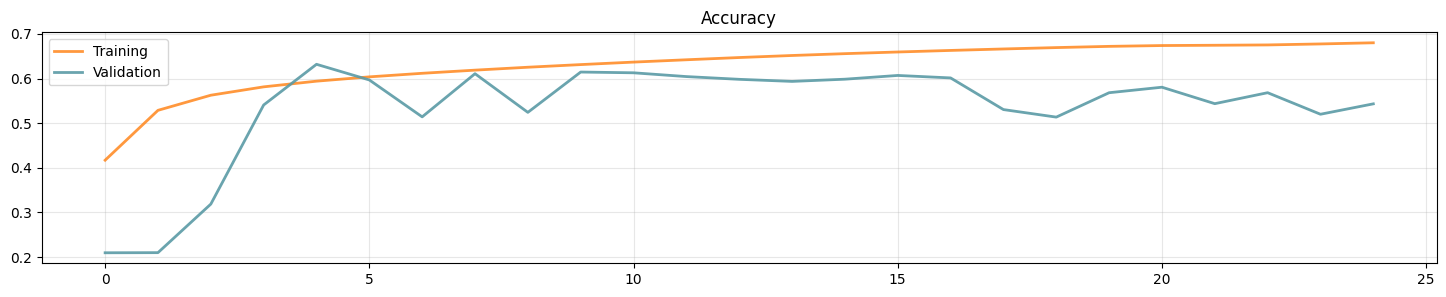

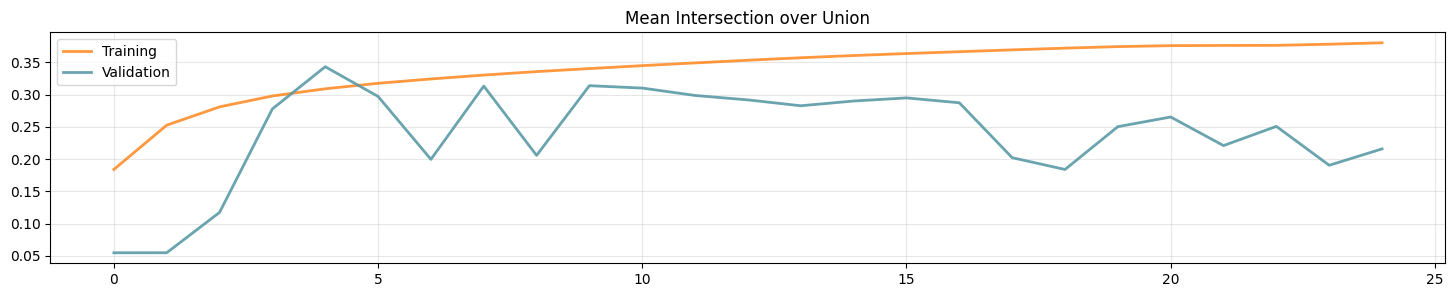

In [28]:
# Plot and display training and validation loss
plt.figure(figsize=(18, 3))
plt.plot(history['loss'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_loss'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Cross Entropy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot and display training and validation accuracy
plt.figure(figsize=(18, 3))
plt.plot(history['accuracy'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_accuracy'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot and display training and validation mean IoU
plt.figure(figsize=(18, 3))
plt.plot(history['mean_iou'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_mean_iou'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Mean Intersection over Union')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 📊 Prepare Your Submission

In our Kaggle competition, submissions are made as `csv` files. To create a proper `csv` file, you need to flatten your predictions and include an `id` column as the first column of your dataframe. To maintain consistency between your results and our solution, please avoid shuffling the test set. The code below demonstrates how to prepare the `csv` file from your model predictions.




In [29]:
# If model_filename is not defined, load the most recent model from Google Drive
if "model_filename" not in globals() or model_filename is None:
    files = [f for f in os.listdir('.') if os.path.isfile(f) and f.startswith('model_') and f.endswith('.keras')]
    files.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    if files:
        model_filename = files[0]
    else:
        raise FileNotFoundError("No model files found in the current directory.")

In [30]:
model = tfk.models.load_model(model_filename, compile=False)

# Compile the model with specified loss, optimizer, and metrics
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tfk.optimizers.AdamW(LEARNING_RATE),
    metrics=["accuracy", MeanIntersectionOverUnion(num_classes=NUM_CLASSES, labels_to_exclude=[0])]
)

print(f"Model loaded from {model_filename}")

Model loaded from UNet_34.31.keras


In [31]:
preds = model.predict(X_test)
preds = np.argmax(preds, axis=-1)
print(f"Predictions shape: {preds.shape}")

314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Predictions shape: (10022, 64, 128)


In [32]:
def y_to_df(y) -> pd.DataFrame:
    """Converts segmentation predictions into a DataFrame format for Kaggle."""
    n_samples = len(y)
    y_flat = y.reshape(n_samples, -1)
    df = pd.DataFrame(y_flat)
    df["id"] = np.arange(n_samples)
    cols = ["id"] + [col for col in df.columns if col != "id"]
    return df[cols]

In [ ]:
# Create and download the csv submission file
timestep_str = model_filename.replace("model_", "").replace(".keras", "")
submission_filename = f"submission_{timestep_str}.csv"
submission_df = y_to_df(preds)
submission_df.to_csv(submission_filename, index=False)

# from google.colab import files
# files.download(submission_filename)

#  
<img src="https://airlab.deib.polimi.it/wp-content/uploads/2019/07/airlab-logo-new_cropped.png" width="350">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Instagram_logo_2022.svg/800px-Instagram_logo_2022.svg.png" width="15"> **Instagram:** https://www.instagram.com/airlab_polimi/

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/LinkedIn_icon.svg/2048px-LinkedIn_icon.svg.png" width="15"> **LinkedIn:** https://www.linkedin.com/company/airlab-polimi/
___
Credits: Alberto Archetti 📧 alberto.archetti@polito.it





```
   Copyright 2024 Alberto Archetti

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
```